In [1]:
# Importing and setup
#Installing Modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import collections
import re
import math
import string
from tqdm import tqdm, trange
from statistics import mean
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import pos_tag, word_tokenize, sent_tokenize
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.utils.extmath import randomized_svd
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc
from sklearn import svm
from sklearn.decomposition import NMF,TruncatedSVD
import pickle
import pandas as pd
import matplotlib
import sklearn
import numpy as np
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag, word_tokenize, sent_tokenize
import string
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/snawshad26/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/snawshad26/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/snawshad26/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
#load in dataset
df = pd.read_csv('Project1-Classification.csv')
df.head(10)

,full_text,summary,keywords,publish_date,authors,url,leaf_label,root_label
0,"'Pure Hockey, the largest hockey retailer in t...","'Pure Hockey, the largest hockey retailer in t...","['acquire', 'agrees', 'nevada', 'retail', 'hoc...",2022-10-21 17:11:22+00:00,['Ein News'],https://www.einnews.com/pr_news/597148062/pure...,hockey,sports
1,'HKO Hockey Canada Sponsorship 20221006\n\nHoc...,'The tally of Hockey Canada’s sponsorship loss...,"['sexual', 'exclusive', 'settlement', 'million...",NaN,['Barbara Shecter'],https://ca.finance.yahoo.com/news/exclusive-ho...,hockey,sports
2,'Canadian Prime Minister Justin Trudeau said W...,'Canadian Prime Minister Justin Trudeau said W...,"['québec', 'surprise', 'trust', 'sexual', 'org...",2022-10-05 00:00:00,['The Athletic Staff'],https://theathletic.com/3659888/2022/10/05/hoc...,hockey,sports
3,'Hockey Canada paid a crisis communications fi...,'Nicholson says that Hockey Canada did not go ...,"['sexual', 'organization', 'million', 'ceo', '...",2022-11-15 00:00:00,['Dan Robson'],https://theathletic.com/3900630/2022/11/15/hoc...,hockey,sports
4,'The Denver Broncos are looking for a new head...,'The Denver Broncos are looking for a new head...,"['beats', 'force', 'season', 'teams', 'anchora...",NaN,"['Parker Seibold', 'The Gazette', 'Gazette File']",https://gazette.com/multimedia/photo-air-force...,hockey,sports
5,'Referee Martin Pronovost wears a Hockey Canad...,'Hockey Canada reached a settlement in May wit...,"['situation', 'culture', 'needs', 'sexual', 'i...",NaN,['Sara Civian'],https://bleacherreport.com/articles/10052673-m...,hockey,sports
6,'Sonny Milano tied it with less than three min...,'Flyers Capitals Hockey Washington Capitals le...,"['ovechkins', 'ot', 'goal', 'game', 'philadelp...",2022-11-24 05:26:00+00:00,['News Traffic Weather'],https://wtop.com/washington-capitals/2022/11/a...,hockey,sports
7,'GRAND FORKS — A hockey stick in pieces used t...,'GRAND FORKS — A hockey stick in pieces used t...,"['stick', 'repairs', 'process', 'dakota', 'nor...",2022-11-29 13:33:00,"['A South Dakota Native', 'Hunter Joined Forum...",https://www.inforum.com/business/a-broken-hock...,hockey,sports
8,'Alex Ovechkin tied Gordie Howe for the most g...,'Capitals Red Wings Hockey Detroit Red Wings c...,"['ovechkin', 'wings', 'red', 'howes', 'osorio'...",2022-11-04 02:51:00+00:00,['News Traffic Weather'],https://wtop.com/washington-capitals/2022/11/o...,hockey,sports
9,'Hockey Canada’s members have elected a new bo...,'Hockey Canada’s members have elected a new bo...,"['elect', 'sexual', 'organization', 'allegatio...",2022-12-17 00:00:00,['The Athletic Staff'],https://theathletic.com/4011708/2022/12/17/hoc...,hockey,sports


Text(0.5, 1.0, 'The total number of alpha-numeric characters per data point (row) in the feature full_text')

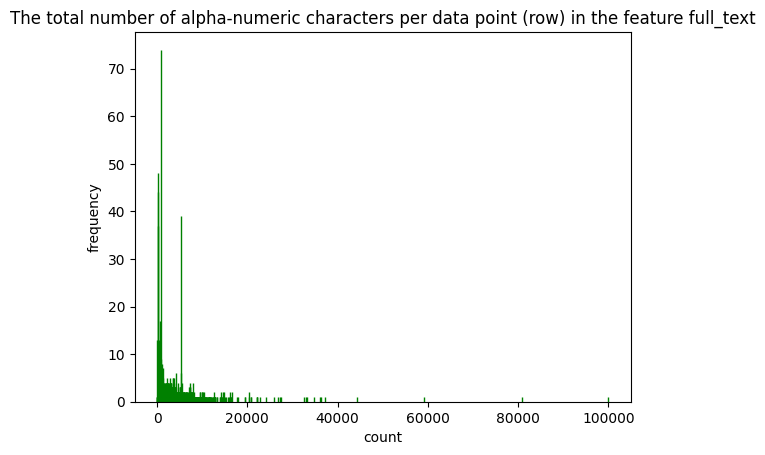

In [3]:
'''Histograms: Plot 3 histograms on : (a) The total number of alpha-numeric characters per
data point (row) in the feature full text: i.e count on the x-axis and frequency on the y-axis;
(b) The column leaf label – class on the x-axis; (c) The column root label – class on the
x-axis'''
#(a)
dataset=df['full_text'].str.split() #split first
dataset=df['full_text'].str.len() #find the length
dataset.head(10)#summary of the length
#plt.hist(dataset,bins=len(set(dataset)))


total = dataset.to_numpy()
amount, counts = np.unique(total, return_counts=True)
plt.bar(amount,counts,edgecolor = 'green')
plt.xlabel('count')
plt.ylabel('frequency')
plt.title('The total number of alpha-numeric characters per data point (row) in the feature full_text')

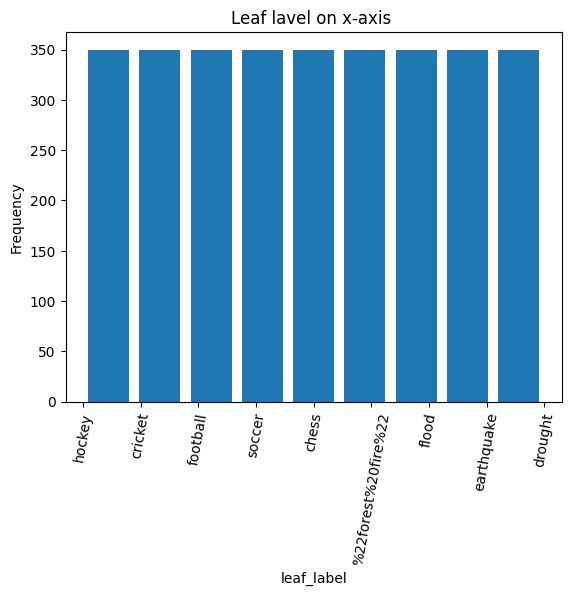

In [4]:
#(b)
leaf = df["leaf_label"].value_counts()
# print(leaf)
plt.hist(df["leaf_label"], bins = len(leaf), rwidth = 0.8)
plt.title("Leaf lavel on x-axis ")
plt.xlabel("leaf_label")
plt.ylabel("Frequency")
plt.xticks(rotation=80)
plt.show()

root_label
sports     1750
climate    1400
Name: count, dtype: int64


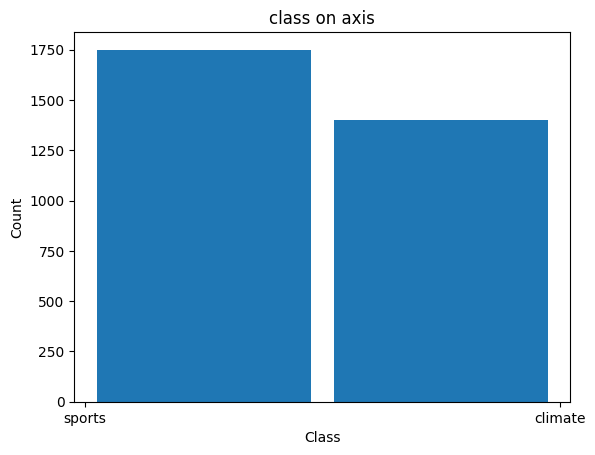

In [5]:
#(c)
label = df["root_label"].value_counts()
plt.hist(df["root_label"], bins = len(label),rwidth = 0.9)
plt.title("class on axis")
plt.xlabel("Class")
plt.ylabel("Count")
print(label)

In [6]:
########## Question 2
import numpy as np
import random
np.random.seed(42)
random.seed(42)
from sklearn.model_selection import train_test_split
train, test = train_test_split(df[["full_text","root_label"]], test_size=0.2)
print("There are " + str(train.shape[0]) + " training samples and " + str(test.shape[0]) + " test samples.")

There are 2520 training samples and 630 test samples.


In [7]:
########## Question 3
#Clean up the data, code from discussion session
def clean(text):
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    texter = re.sub(r"<br />", " ", text)
    texter = re.sub(r"&quot;", "\"",texter)
    texter = re.sub('&#39;', "\"", texter)
    texter = re.sub('\n', " ", texter)
    texter = re.sub(' u '," you ", texter)
    texter = re.sub('`',"", texter)
    texter = re.sub(' +', ' ', texter)
    texter = re.sub(r"(!)\1+", r"!", texter)
    texter = re.sub(r"(\?)\1+", r"?", texter)
    texter = re.sub('&amp;', 'and', texter)
    texter = re.sub('\r', ' ',texter)
    clean = re.compile('<.*?>')
    texter = texter.encode('ascii', 'ignore').decode('ascii')
    texter = re.sub(clean, '', texter)
    if texter == "":
        texter = ""
    return texter
#get ride of the number
def remove_numbers(text):
    text_nonum = re.sub(r'\b[0-9]+\b\s*', '', text)
    clean_text = []
    for word in word_tokenize(text):
        if (not any(char.isdigit() for char in word)):
            clean_text.append(word)
    return ' '.join(clean_text)
#code from discussion
def penn2morphy(penntag):  
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 
#data clearning
def clean_data(text):  
    text = clean(text)
    text = remove_numbers(text)
    return text
#stemming
def stem(text):
    stemmer = PorterStemmer()
    stemmed_words = []
    for word in word_tokenize(text):
        if (not any(char in word for char in string.punctuation)):
            stemmed_words.append(stemmer.stem(word))
    return ' '.join(stemmed_words)

# try lemmatization
def lemmatization(text):
    lemmatizer = WordNetLemmatizer()

    sent_pos_tags = [pos_tag(word_tokenize(sent)) for sent in sent_tokenize(text)]
    pos_tags = []
    for sentence_tags in sent_pos_tags:
        for tags in sentence_tags:
            pos_tags.append(tags)
    
    lemmatized_words = []
    lemm_text = [lemmatizer.lemmatize(word, pos = penn2morphy(tag)) for word, tag in pos_tags]
    for lemma in lemm_text:
        if (not any(char in lemma for char in string.punctuation)):
            lemmatized_words.append(lemma.lower())
    return ' '.join(lemmatized_words)


def preprocessing(text):
    text = clean_data(text)
    text = remove_numbers(text)
    text = lemmatization(text)
    return text

In [8]:
import pickle
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
tqdm.pandas() # require pandas == 1.3.5 and tqdm > 4.50.1
train['clean_data'] = train['full_text'].progress_apply(lambda x:preprocessing(x))
test['clean_data'] = test['full_text'].progress_apply(lambda x:preprocessing(x))
train.head()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/snawshad26/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/snawshad26/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
100%|██████████| 630/630 [00:11<00:00, 53.66it/s]


,full_text,root_label,clean_data
2310,"'As of Sunday night, a lopsided area of low pr...",climate,of sunday night a lopsided area of low pressur...
2189,'The U.N. children’s agency says some 2 millio...,climate,childrens agency say some million child in are...
2304,'Wicked winds and heavy rains battered the sta...,climate,wind and heavy rain batter the state of maine ...
2988,'I live in a community with a homeowners assoc...,climate,i live in a community with a homeowner associa...
221,'The Special Olympics team took home the hard ...,sports,special olympics team take home the hard fough...


In [10]:
# count_vect = CountVectorizer()
#count_vect = CountVectorizer(stop_words='english')
count_vect = CountVectorizer(stop_words="english", min_df=3)
tfidf_tranformer = TfidfTransformer(use_idf=True)
#get the train matrix
train_count_vect = count_vect.fit_transform(train['clean_data'])
train_df = tfidf_tranformer.fit_transform(train_count_vect).toarray()
#get the test matrix
test_count_vect = count_vect.transform(test['clean_data'])
test_df = tfidf_tranformer.transform(test_count_vect).toarray()
#print out the shape
print('train matrix shape',train_df.shape)
print('test matrix shape:', test_df.shape)


train matrix shape (2520, 14076)
test matrix shape: (630, 14076)


In [11]:
#in this part we interested to see how columns changed
def affect_min_df(min_df, train, test):
    count_vectorizer = CountVectorizer(stop_words="english", min_df=min_df)
    tfidf_tranformer = TfidfTransformer(use_idf=True)    
    train_count_vectorizer = count_vectorizer.fit_transform(train['clean_data'])
    train_df = tfidf_tranformer.fit_transform(train_count_vectorizer).toarray()
    
    test_count_vectorizer = count_vectorizer.transform(test['clean_data'])
    test_df = tfidf_tranformer.transform(test_count_vectorizer).toarray()
    
    print(f"when min_df = {min_df}")
    print('train matrix shape:', train_df.shape)
    print('test matrix shape:', test_df.shape)
    print()
    return train, test

for i in range(1,5):
    affect_min_df(i, train, test)

when min_df = 1
train matrix shape: (2520, 34769)
test matrix shape: (630, 34769)

when min_df = 2
train matrix shape: (2520, 19362)
test matrix shape: (630, 19362)

when min_df = 3
train matrix shape: (2520, 14076)
test matrix shape: (630, 14076)

when min_df = 4
train matrix shape: (2520, 11330)
test matrix shape: (630, 11330)



In [ ]:
#########Question 4 part b
#Get MSE Error of LSI
u,sig,vtran = randomized_svd(train_df,random_state=42,n_components=50) 
X = np.dot(np.dot(u,np.diag(sig)),vtran) #formula
LSI_MSE = np.sqrt(np.sum(np.square(X - train_df)))
#Get MSE Error of NMF
nmf = NMF(n_components=50, init='random', random_state=42)
nmf_train = nmf.fit_transform(train_df)
WTH = np.dot(nmf_train, nmf.components_)
NMF_MSE = np.sqrt(np.sum(np.square(train_df-WTH)))
print("MSE Error for LSI is " + str(LSI_MSE))
print("MSE Error for NMF is " + str(NMF_MSE))

/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

Best value of C: 10000

Best SVM (C=10000.00000):
Confusion matrix:

Confusion matrix, without normalization
[[325  14]
 [ 15 276]]


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


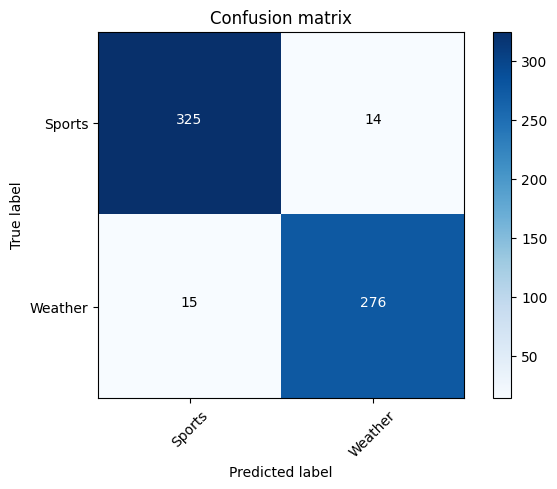

Accuracy: 0.953968253968254
Precision: 0.9538032454361055
Recall: 0.9535778365720888
F1 score: 0.953688095533829


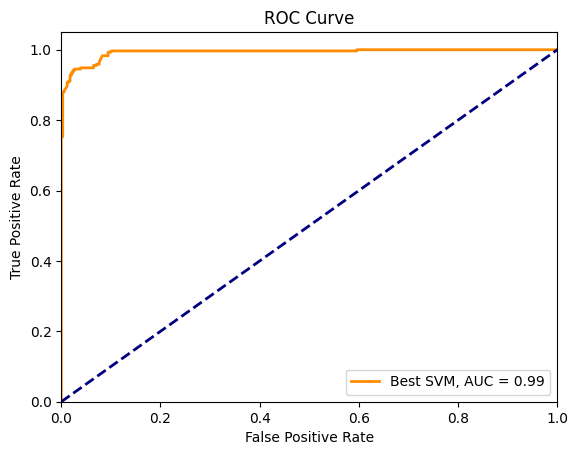

In [17]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import re
from sklearn.model_selection import train_test_split
df = pd.read_csv('Project1-Classification.csv')

leaf_label_map = {label: i for i, label in enumerate(df['leaf_label'].unique())}
df['leaf_label_int'] = df['leaf_label'].map(leaf_label_map)

root_label_map = {label: i for i, label in enumerate(df['root_label'].unique())}
df['root_label_int'] = df['root_label'].map(root_label_map)
train, test = train_test_split(df[["full_text","root_label_int"]], test_size=0.2)
def clean(text):
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    texter = re.sub(r"<br />", " ", text)
    texter = re.sub(r"&quot;", "\"",texter)
    texter = re.sub('&#39;', "\"", texter)
    texter = re.sub('\n', " ", texter)
    texter = re.sub(' u '," you ", texter)
    texter = re.sub('`',"", texter)
    texter = re.sub(' +', ' ', texter)
    texter = re.sub(r"(!)\1+", r"!", texter)
    texter = re.sub(r"(\?)\1+", r"?", texter)
    texter = re.sub('&amp;', 'and', texter)
    texter = re.sub('\r', ' ',texter)
    clean = re.compile('<.*?>')
    texter = texter.encode('ascii', 'ignore').decode('ascii')
    texter = re.sub(clean, '', texter)
    if texter == "":
        texter = ""
    return texter

def penn2morphy(penntag): 
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatized(text):
    lemmatizer = WordNetLemmatizer()

    sent_pos_tags = [pos_tag(word_tokenize(sent)) for sent in sent_tokenize(text)]
    pos_tags = []
    for sentence_tags in sent_pos_tags:
        for tags in sentence_tags:
            pos_tags.append(tags)
    
    lemmatized_words = []
    lemm_text = [lemmatizer.lemmatize(word, pos = penn2morphy(tag)) for word, tag in pos_tags]
    for lemma in lemm_text:
        if (not any(char in lemma for char in string.punctuation)):
            lemmatized_words.append(lemma.lower())
    return ' '.join(lemmatized_words)

def preprocess(text):
  return lemmatized(clean(text))
  

# processing data by using provided cleaner code
train["cleaned"] = train['full_text'].apply(lambda x:preprocess(x))
test["cleaned"] = test['full_text'].apply(lambda x:preprocess(x))

# Using english stopwords of the CountVectorizer and excluding terms that are numbers with the token pattern argument
from sklearn.feature_extraction.text import CountVectorizer
tfidf_transformer = TfidfTransformer(use_idf=True)
pattern = r'\b[A-Za-z]+\b'
vectorizer = CountVectorizer(stop_words='english',token_pattern = pattern, min_df=3)

# Creating vector representations from the CountVectorizer created of the processed training and test data
Xtrain_vec = vectorizer.fit_transform(train['cleaned'])
Xtrain_tf = tfidf_transformer.fit_transform(Xtrain_vec)
Xtrain_array_tf = Xtrain_tf.toarray()
Xtrain = pd.DataFrame(data = Xtrain_array_tf, columns = vectorizer.get_feature_names_out())

Xtest_vec = vectorizer.transform(test['cleaned'])
Xtest_tf = tfidf_transformer.transform(Xtest_vec)
Xtest_array_tf = Xtest_tf.toarray()
Xtest = pd.DataFrame(data = Xtest_array_tf, columns = vectorizer.get_feature_names_out())

ytrain_true = train['root_label_int'].values
ytest_true = test['root_label_int'].values
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
k = 50
svd = TruncatedSVD(n_components = k)
Xtrain_lsi = svd.fit_transform(Xtrain)
Xtest_lsi = svd.transform(Xtest)
########## Question 5 - Cross Validation for best gamma
# Define the range of C values to try
param_grid = {'C': [10**k for k in range(-3, 7)]}

# Define the cross-validation object
cv = GridSearchCV(LinearSVC(max_iter=10000), param_grid, cv=5)

# Fit the cross-validation object to the training data
cv.fit(Xtrain, ytrain_true)

# Print the best value of C found by cross-validation
print("Best value of C:", cv.best_params_['C'])

# Train linear SVM with the best C value found
svm_best = LinearSVC(C=cv.best_params_['C'], max_iter=10000)
svm_best.fit(Xtrain, ytrain_true)

# Predict class labels of test data using the best SVM
y_pred_best = svm_best.predict(Xtest)

# Evaluate performance of the best SVM
print("\nBest SVM (C={:.5f}):".format(cv.best_params_['C']))
print("Confusion matrix:\n")
plt.figure()
plot_confusion_matrix(confusion_matrix(ytest_true, y_pred_best), classes = ['Sports', 'Weather'])
plt.show()
print("Accuracy:", accuracy_score(ytest_true, y_pred_best))
print("Precision:", precision_score(ytest_true, y_pred_best, average='macro'))
print("Recall:", recall_score(ytest_true, y_pred_best, average='macro'))
print("F1 score:", f1_score(ytest_true, y_pred_best, average='macro'))

# Plot ROC curve for the best SVM
fpr_best, tpr_best, _ = roc_curve(ytest_true, svm_best.decision_function(Xtest))
roc_auc_best = auc(fpr_best, tpr_best)

plt.figure()
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label='Best SVM, AUC = %0.2f' % roc_auc_best)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


Accuracy score for Logistic Regression without regularization: 0.968254
Recall score for Logistic Regression without regularization: 0.958763
Precision score for Logistic Regression without regularization: 0.972125
F-1 score for Logistic Regression without regularization: 0.965398
Confusion matrix, without normalization
[[331   8]
 [ 12 279]]


/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


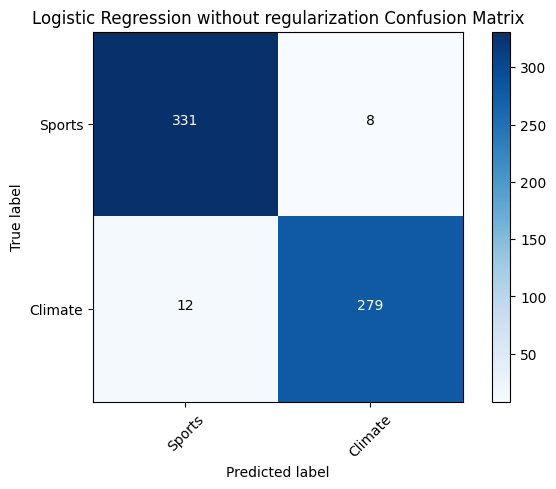

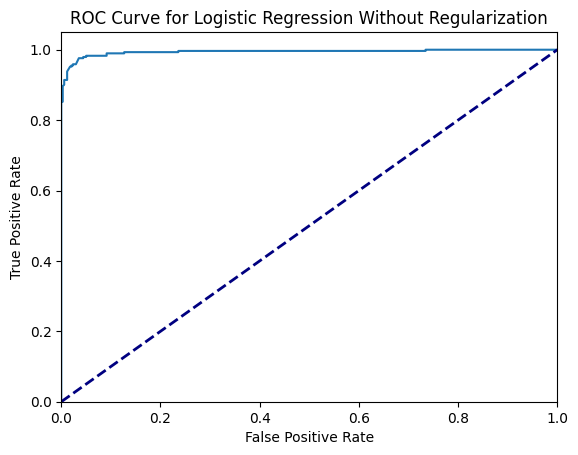

In [18]:
########## Question 6 - Logistic regression no regularization
def Classifier_Metric_printer(y_test,y_pred,name="",average='binary'):
    print("Accuracy score for %s: %f" %(name,accuracy_score(y_test,y_pred)))
    print("Recall score for %s: %f" % (name,recall_score(y_test,y_pred,average=average)))
    print("Precision score for %s: %f" % (name,precision_score(y_test,y_pred,average=average)))
    print("F-1 score for %s: %f" % (name,f1_score(y_test,y_pred,average=average)))

class_names = ["Sports","Climate"]
LR = LogisticRegression(penalty = 'none', random_state = 42)
pred_lr = LR.fit(Xtrain_lsi,ytrain_true).predict(Xtest_lsi)

Classifier_Metric_printer(ytest_true, pred_lr, name="Logistic Regression without regularization")
Logistics_Regression_cm = confusion_matrix(ytest_true,pred_lr)
plt.figure() 
plot_confusion_matrix(Logistics_Regression_cm, classes=class_names, title='Logistic Regression without regularization Confusion Matrix') 

fpr_lr, tpr_lr, _ = roc_curve(ytest_true,LR.decision_function(Xtest_lsi))
plt.figure()
plt.plot(fpr_lr,tpr_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Without Regularization')
plt.show()

In [19]:
########## Question 6 - Finding the best L1 regularization term
from prettytable import PrettyTable

regularizations = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]

acc_l1 = []
mean_coeff_l1 = []
acc_l2 = []
mean_coeff_l2 = []
peak_accuracy_l1 = 0
peak_l1 = 0

table_l1 = PrettyTable()
table_l1.field_names = ["L1 Value", "Accuracy", "Standard Deviation"]
table_l1.title = "L1 Reg Scores"

for l1 in regularizations:
    LR = LogisticRegression(penalty="l1", random_state=42, solver="liblinear", C=l1)
    pred_lr = LR.fit(Xtrain_lsi, ytrain_true).predict(Xtest_lsi)
    scores = cross_val_score(LR, Xtrain_lsi, ytrain_true, cv = 5)
    acc_l1.append(accuracy_score(ytest_true, pred_lr))
    mean_coeff_l1.append(np.mean(LR.coef_))
    if scores.mean() > peak_accuracy_l1:
        peak_accuracy_l1 = scores.mean()
        peak_l1 = l1
    table_l1.add_row([l1, scores.mean(), scores.std()])

print(table_l1)
print("Best l1 is "+str(peak_l1))

+-------------------------------------------------------+
|                     L1 Reg Scores                     |
+----------+--------------------+-----------------------+
| L1 Value |      Accuracy      |   Standard Deviation  |
+----------+--------------------+-----------------------+
|  1e-05   | 0.5599206349206349 | 0.0007936507936507908 |
|  0.0001  | 0.5599206349206349 | 0.0007936507936507908 |
|  0.001   | 0.5599206349206349 | 0.0007936507936507908 |
|   0.01   | 0.5599206349206349 | 0.0007936507936507908 |
|   0.1    | 0.923015873015873  |  0.01082395372776656  |
|    1     | 0.9432539682539683 |  0.009848947338087947 |
|    10    | 0.9543650793650793 |  0.00996023841111996  |
|   100    | 0.9563492063492063 |  0.007936507936507953 |
|   1000   | 0.9567460317460318 |  0.008171135032529388 |
|  10000   | 0.9567460317460318 |  0.008171135032529388 |
|  100000  | 0.9567460317460318 |  0.008171135032529388 |
+----------+--------------------+-----------------------+
Best l1 is 100

In [20]:
########## Question 6 - Finding the best L2 regularization term
peak_l2 = 0
peak_accuracy_l2 = 0
table_l2 = PrettyTable()
table_l2.field_names = ["L2 Value", "Accuracy", "Standard Deviation"]
table_l2.title = "L2 Reg Scores"

for l2 in regularizations:
    LR = LogisticRegression(penalty="l2", random_state=42, solver="liblinear", C=l2)
    pred_lr = LR.fit(Xtrain_lsi, ytrain_true).predict(Xtest_lsi)
    scores = cross_val_score(LR, Xtrain_lsi, ytrain_true, cv = 5)
    acc_l2.append(accuracy_score(ytest_true, pred_lr))
    mean_coeff_l2.append(np.mean(LR.coef_))
    if scores.mean() > peak_accuracy_l2:
        peak_accuracy_l2 = scores.mean()
        peak_l2 = l2
    table_l2.add_row([l2, scores.mean(), scores.std()])

print(table_l2)
print("Best l2 is "+str(peak_l2))


+-------------------------------------------------------+
|                     L2 Reg Scores                     |
+----------+--------------------+-----------------------+
| L2 Value |      Accuracy      |   Standard Deviation  |
+----------+--------------------+-----------------------+
|  1e-05   | 0.5599206349206349 | 0.0007936507936507908 |
|  0.0001  | 0.5599206349206349 | 0.0007936507936507908 |
|  0.001   | 0.5599206349206349 | 0.0007936507936507908 |
|   0.01   | 0.6563492063492063 |  0.008266931212698248 |
|   0.1    | 0.9210317460317461 |  0.011664236870396088 |
|    1     | 0.9428571428571428 |  0.01082395372776654  |
|    10    | 0.9503968253968254 |  0.008228746568780861 |
|   100    | 0.955952380952381  |  0.00908374852560287  |
|   1000   | 0.9563492063492063 |  0.00860296959868208  |
|  10000   | 0.9571428571428571 |  0.007995810190321397 |
|  100000  | 0.9567460317460318 |  0.008171135032529388 |
+----------+--------------------+-----------------------+
Best l2 is 100

Performance with L1 Regularization
Accuracy score for Logistic Regression with L1 regularization: 0.963492
Recall score for Logistic Regression with L1 regularization: 0.955326
Precision score for Logistic Regression with L1 regularization: 0.965278
F-1 score for Logistic Regression with L1 regularization: 0.960276
Confusion matrix, without normalization
[[329  10]
 [ 13 278]]


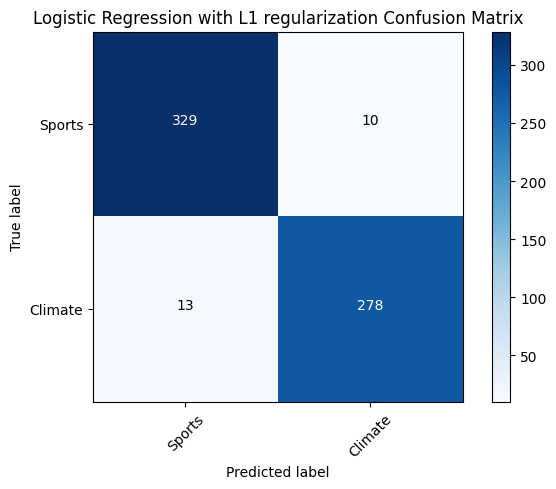

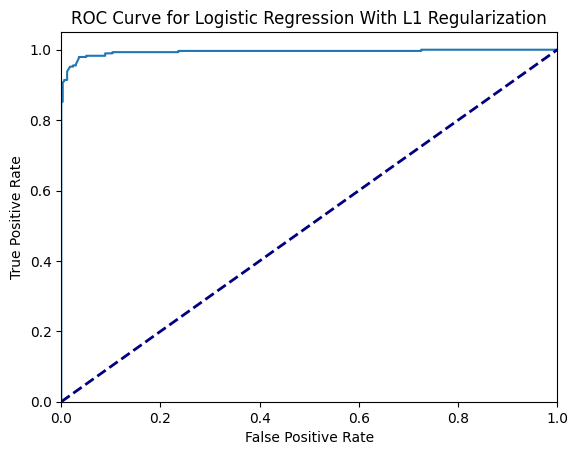

Performance with L2 Regularization
Accuracy score for Logistic Regression with L2 regularization: 0.963492
Recall score for Logistic Regression with L2 regularization: 0.955326
Precision score for Logistic Regression with L2 regularization: 0.965278
F-1 score for Logistic Regression with L2 regularization: 0.960276
Confusion matrix, without normalization
[[329  10]
 [ 13 278]]


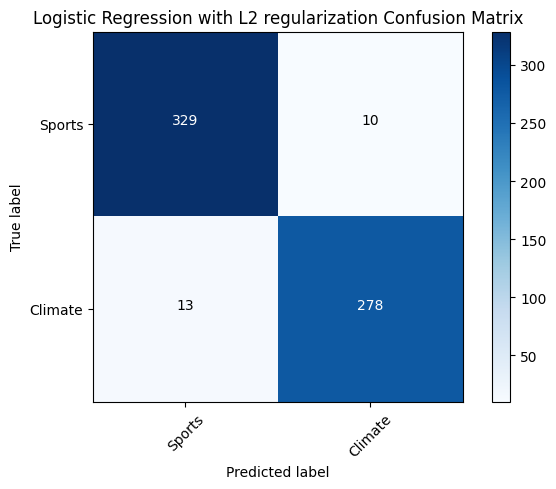

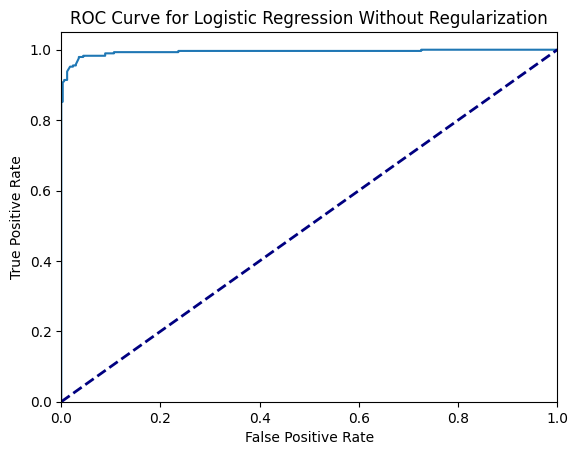

Performance without Regularization
Accuracy score for Logistic Regression with no regularization: 0.968254
Recall score for Logistic Regression with no regularization: 0.958763
Precision score for Logistic Regression with no regularization: 0.972125
F-1 score for Logistic Regression with no regularization: 0.965398
Confusion matrix, without normalization
[[331   8]
 [ 12 279]]


/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


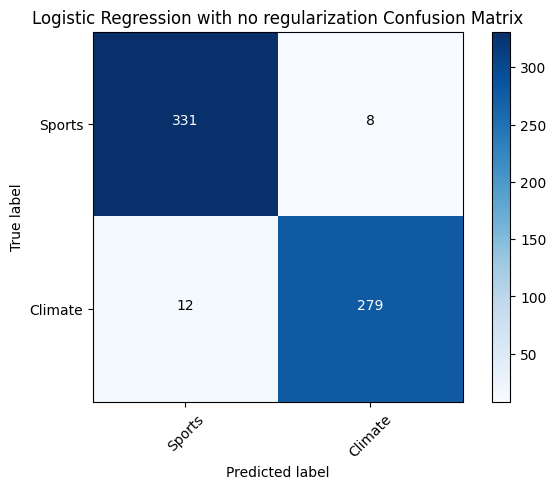

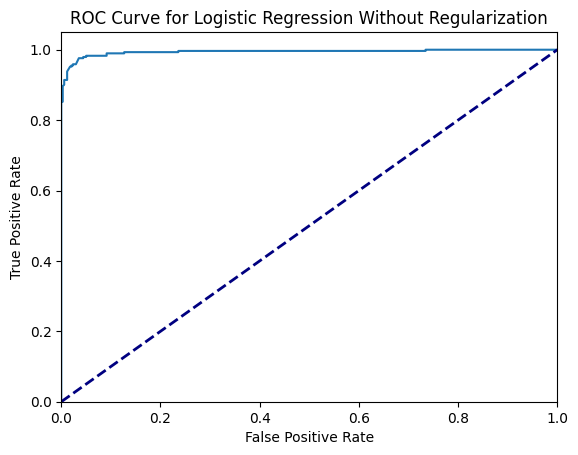

In [21]:
########## Question 6 - Stating Performance for L1, L2, and no regularization
#Performance with L1 Regularization
print("Performance with L1 Regularization")
LR = LogisticRegression(penalty='l1',random_state = 42,solver='liblinear', C=peak_l1)
pred_lr = LR.fit(Xtrain_lsi,ytrain_true).predict(Xtest_lsi)
Classifier_Metric_printer(ytest_true, pred_lr, name="Logistic Regression with L1 regularization")
Logistics_Regression_cm = confusion_matrix(ytest_true, pred_lr) 
plt.figure() 
plot_confusion_matrix(Logistics_Regression_cm, classes=class_names, title='Logistic Regression with L1 regularization Confusion Matrix') 
fpr_lr, tpr_lr, _ = roc_curve(ytest_true,LR.decision_function(Xtest_lsi))
plt.figure()
plt.plot(fpr_lr,tpr_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression With L1 Regularization')
plt.show()

#Performance with L2 Regularization
print("Performance with L2 Regularization")
LR = LogisticRegression(penalty='l2',random_state = 42,solver='liblinear', C=peak_l2)
pred_lr = LR.fit(Xtrain_lsi,ytrain_true).predict(Xtest_lsi)
Classifier_Metric_printer(ytest_true, pred_lr, name="Logistic Regression with L2 regularization")
Logistics_Regression_cm = confusion_matrix(ytest_true, pred_lr) 
plt.figure() 
plot_confusion_matrix(Logistics_Regression_cm, classes=class_names, title='Logistic Regression with L2 regularization Confusion Matrix') 
fpr_lr, tpr_lr, _ = roc_curve(ytest_true,LR.decision_function(Xtest_lsi))
plt.figure()
plt.plot(fpr_lr,tpr_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Without Regularization')
plt.show()

#Performance with no Regularization
print("Performance without Regularization")
LR = LogisticRegression(penalty='none',random_state = 42)
pred_lr = LR.fit(Xtrain_lsi,ytrain_true).predict(Xtest_lsi)
Classifier_Metric_printer(ytest_true, pred_lr, name="Logistic Regression with no regularization")
Logistics_Regression_cm = confusion_matrix(ytest_true, pred_lr) 
plt.figure() 
plot_confusion_matrix(Logistics_Regression_cm, classes=class_names, title='Logistic Regression with no regularization Confusion Matrix') 
fpr_lr, tpr_lr, _ = roc_curve(ytest_true,LR.decision_function(Xtest_lsi))
plt.figure()
plt.plot(fpr_lr,tpr_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Without Regularization')
plt.show()


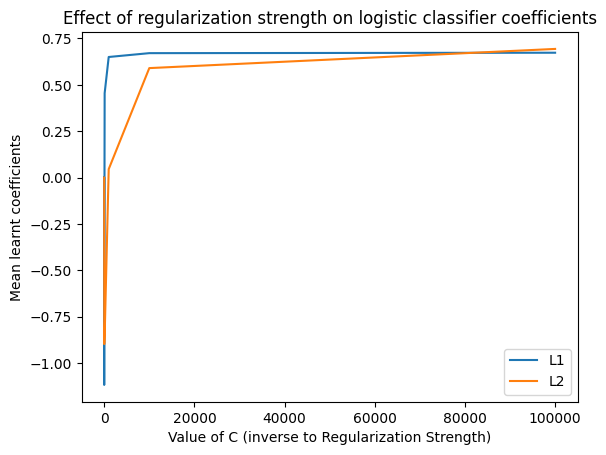

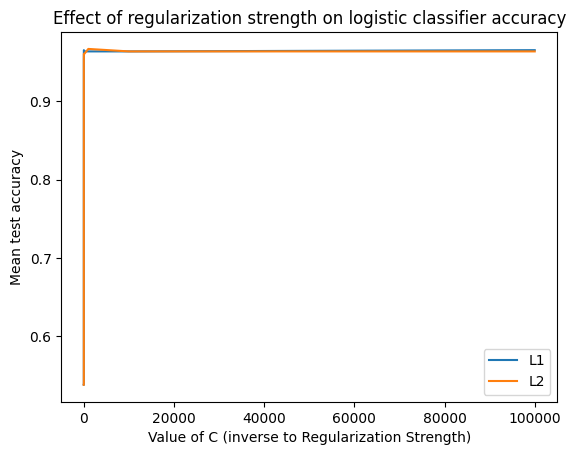

In [22]:
plt.title('Effect of regularization strength on logistic classifier coefficients')
plt.plot(regularizations,mean_coeff_l1,label='L1')
plt.plot(regularizations,mean_coeff_l2,label='L2')
plt.xlabel('Value of C (inverse to Regularization Strength)')
plt.ylabel('Mean learnt coefficients')
plt.legend()
plt.show()

fig, ax = plt.subplots()
plt.title('Effect of regularization strength on logistic classifier accuracy')
plt.plot(regularizations,acc_l1,label='L1')
plt.plot(regularizations,acc_l2,label='L2')
plt.xlabel('Value of C (inverse to Regularization Strength)')
plt.ylabel('Mean test accuracy')
plt.legend()
plt.show()

Confusion matrix, without normalization
[[301  38]
 [ 10 281]]


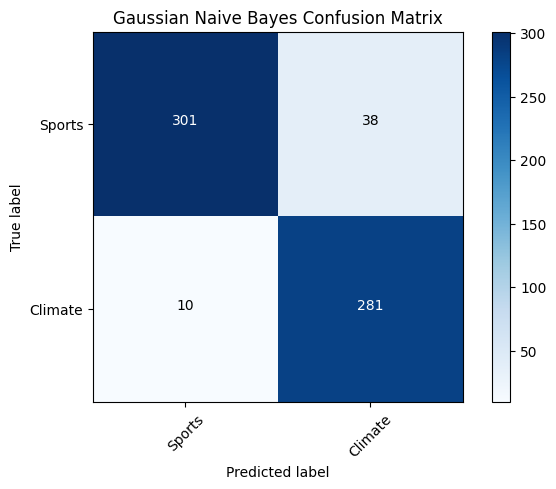

Accuracy:  0.9238095238095239
Recall:  0.9656357388316151
Precision:  0.8808777429467085
F-1 score:  0.921311475409836


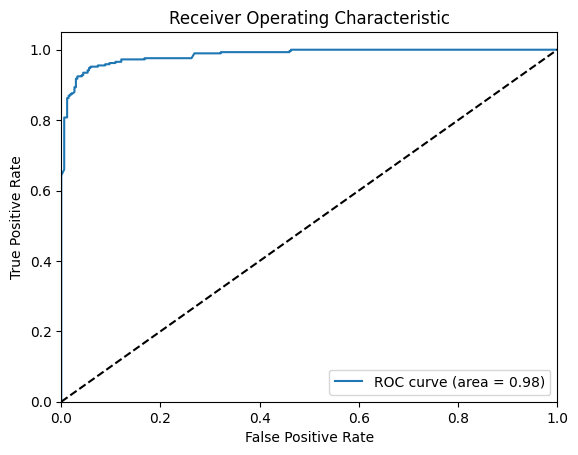

In [23]:
########## Question 7 - Gaussian Naive Bayes Classifier
# Train the GaussianNB classifier
gnb = GaussianNB()
gnb.fit(Xtrain_lsi, ytrain_true)

# Predict the labels of the testing set
y_pred = gnb.predict(Xtest_lsi)

# Compute the confusion matrix
cm = confusion_matrix(ytest_true, y_pred)

# Compute the accuracy, recall, precision and F-1 score
accuracy = accuracy_score(ytest_true, y_pred)
recall = recall_score(ytest_true, y_pred)
precision = precision_score(ytest_true, y_pred)
f1 = f1_score(ytest_true, y_pred)

plt.figure()
plot_confusion_matrix(cm, classes=class_names, title='Gaussian Naive Bayes Confusion Matrix') 
plt.show()

print("Accuracy: ", accuracy)
print("Recall: ", recall)
print("Precision: ", precision)
print("F-1 score: ", f1)

# Plot the ROC curve
y_prob = gnb.predict_proba(Xtest_lsi)[:, 1]
fpr, tpr, thresholds = roc_curve(ytest_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label="ROC curve (area = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()


In [24]:
########## Question 8 - 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.tokenize import word_tokenize
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Define a function to lemmatize the text
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(lemmatized_tokens)

# Define a function to stem the text
def stem_text(text):
    stemmer = SnowballStemmer("english")
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return " ".join(stemmed_tokens)


# Define the pipeline
pipeline = Pipeline([
    ('loading', None),
    ('vectorization', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('dimensionality_reduction', None),
    ('classification', None)
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'loading': [None, ('clean', clean)],
    'vectorization__min_df': [3, 5],
    'vectorization__tokenizer': [None, lemmatize_text, stem_text],
    'dimensionality_reduction': [TruncatedSVD(random_state=42), NMF(random_state=42)],
    'dimensionality_reduction__n_components': [5, 30, 80],
    'classification': [SVC(kernel='rbf', gamma=0.1, C=10), 
                        LogisticRegression(penalty='l1', C=1),
                        LogisticRegression(penalty='l2', C=1),
                        GaussianNB()]
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(train['cleaned'],ytrain_true)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.937 total time=   0.7s
[CV 3/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.921 total time=   0.7s
[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.933 total time=   0.7s
[CV 5/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.893 total time=   0.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x11b0801f0>;, score=0.688 total time=   6.5s
[CV 4/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x1147c41f0>;, score=0.704 total time=   6.4s
[CV 3/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x1334f01f0>;, score=0.736 total time=   6.5s
[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_componen

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x10387da20>;, score=0.732 total time=  10.6s
[CV 4/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x103a75a20>;, score=0.716 total time=  10.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x104961a20>;, score=0.692 total time=  10.9s
[CV 5/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x100e35a20>;, score=0.722 total time=  10.8s
[CV 3/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x1038cda20>;, score=0.752 total time=  11.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x10e4c4dc0>;, score=0.704 total time=   5.4s
[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=('clean', <function clean at 0x10e4fca60>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=('clean', <function clean at 0x10e4c4dc0>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_componen

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x11b048dc0>;, score=0.802 total time=   5.5s
[CV 4/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x10e49e4d0>;, score=0.808 total time=   5.5s
[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x12095bf40>;, score=0.833 total time=   5.6s
[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_compo

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x12298beb0>;, score=0.692 total time=  10.6s
[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x11b327eb0>;, score=0.732 total time=  10.8s
[CV 3/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x123a53eb0>;, score=0.752 total time=  10.6s
[CV 4/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=N

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.937 total time=   0.6s
[CV 5/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.917 total time=   0.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x10387da20>;, score=0.833 total time=   6.3s
[CV 3/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x104961a20>;, score=0.802 total time=   6.2s
[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x103a75a20>;, score=0.800 total time=   6.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x100e35a20>;, score=0.808 total time=   6.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x1038cda20>;, score=0.829 total time=   6.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x11a75bf40>;, score=0.813 total time=  10.8s
[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x11fc5ff40>;, score=0.829 total time=  10.9s
[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=('clean', <function clean at 0x10e49e4d0>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 4/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, 

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x12095bf40>;, score=nan total time=   4.5s
[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x12768fe20>;, score=nan total time=   4.5s
[CV 4/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x11a75bf40>;, score=nan total time=   4.4s
[CV 3/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x11fc5ff40>;, score=nan total time=   4.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x118aca4d0>;, score=0.829 total time=  10.8s
[CV 5/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x12140e4d0>;, score=0.835 total time=  10.5s
[CV 3/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x117c4e4d0>;, score=0.808 total time=  11.0s
[CV 4/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loadi

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.970 total time=   0.8s
[CV 4/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.954 total time=   0.8s
[CV 3/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.940 total time=   0.9s
[CV 5/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.935 total time=   0

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x120e5cdc0>;, score=nan total time=   8.5s
[CV 4/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x1334f0a60>;, score=nan total time=   8.4s
[CV 3/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x10e4fca60>;, score=nan total time=   8.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x11476a4d0>;, score=nan total time=   8.8s
[CV 5/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x11fc5ff40>;, score=nan total time=   8.8s
[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x10387da20>;, score=nan total time=   4.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=('clean', <function clean at 0x11b327eb0>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=('clean', <function clean at 0x10387da20>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 3/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=('clean', <function clean at 0x11b327eb0>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 4/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_compo

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.704 total time=   1.1s


/opt/homebrew/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.

[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x116c8beb0>;, score=0.710 total time=   5.9s
[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x103a75a20>;, score=0.665 total time=   5.9s
[CV 4/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x12095bf40>;, score=nan total time=   8.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packa

[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x12768fe20>;, score=nan total time=   8.5s
[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x1334f0a60>;, score=nan total time=   8.6s
[CV 3/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x11a75bf40>;, score=nan total time=   8.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 5/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x11fc5ff40>;, score=nan total time=   8.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x121d841f0>;, score=0.714 total time=   6.5s
[CV 4/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x10fe101f0>;, score=0.696 total time=   6.3s
[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.708 total time=   0.9s
[CV 5/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<f

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.712 total time=   1.0s
[CV 4/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.768 total time=   0.7s
[CV 3/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.700 total time=   0.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.694 total time=   0.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site

[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x10d6f8a60>;, score=0.710 total time=   5.7s
[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x11fc5ff40>;, score=0.665 total time=   5.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x10fe10a60>;, score=0.714 total time=   5.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x10e4fca60>;, score=0.677 total time=   5.7s
[CV 4/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x121d84a60>;, score=0.696 total time=   5.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-pa

[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x1131c4dc0>;, score=0.722 total time=  11.3s
[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=('clean', <function clean at 0x116c8beb0>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=('clean', <function clean at 0x1131c4dc0>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 3/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=('clean', <function clean a

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.935 total time=   3.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 5/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.919 total time=   4.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site

[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x11fc5ff40>;, score=0.611 total time=  11.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x112a5bf40>;, score=0.722 total time=  11.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 3/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x11dcbc5e0>;, score=0.744 total time=  11.8s
[CV 4/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x11a75bf40>;, score=0.708 total time=  11.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x130ebc5e0>;, score=0.627 total time=  11.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x120e364d0>;, score=0.736 total time=   6.5s
[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x1147c4a60>;, score=0.688 total time=   6.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 4/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x1334f01f0>;, score=0.716 total time=   6.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 3/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x117b7c1f0>;, score=0.754 total time=   7.1s
[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.942 total time=   2.0s
[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.944 total time=   2.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x134b83e20>;, score=0.724 total time=   6.7s
[CV 3/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.927 total time=   2.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.935 total time=   2.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.929 total time=   3.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site

[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x120e941f0>;, score=0.736 total time=   6.3s
[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x134be00d0>;, score=0.688 total time=   6.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 3/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x1334f01f0>;, score=0.754 total time=   6.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x11fc5ff40>;, score=0.718 total time=  11.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x10d6f8a60>;, score=0.720 total time=  11.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 4/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x10e4fca60>;, score=0.810 total time=  11.4s
[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=('clean', <function clean at 0x11a75bf40>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=('clean', <function clean at 0x10e4fca60>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 3/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__mi

/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 3/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=('clean', <function clean at 0x10e4fca60>), vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x10e4fc1f0>;, score=nan total time=   0.0s
[CV 4/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=('clean', <function clean at 0x11a75bf40>), vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x10e4c4dc0>;, score=nan total time=   0.0s
[CV 5/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x121d84a60>;, score=0.728 total time=  11.5s
[CV 5/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionali

/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 5/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x10e4b81f0>;, score=0.724 total time=   6.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/s

[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x12768fe20>;, score=0.718 total time=  12.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x134b83e20>;, score=0.720 total time=  12.9s
[CV 3/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x1334f01f0>;, score=0.766 total time=  12.7s
[CV 4/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x11fc5ff40>;, score=0.810 total time=  12.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x112a5bf40>;, score=0.728 total time=  12.5s
[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.917 total time=  12.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.881 total time=  14.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.925 total time=  15.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.923 total time=  16.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x120e941f0>;, score=0.827 total time=   8.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x134be00d0>;, score=0.776 total time=   9.3s
[CV 4/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x11fc5ff40>;, score=0.744 total time=   9.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 3/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x1334f01f0>;, score=0.798 total time=   9.4s
[CV 5/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x10d6f8a60>;, score=0.792 total time=   9.2s
[CV 5/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.919 total time=  20.4s
[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenize

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x130e5fe20>;, score=0.790 total time=  14.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x126ee05e0>;, score=0.754 total time=  14.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x10fe10a60>;, score=0.774 total time=  15.0s
[CV 4/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.937 total time=  12.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.875 total time=  11.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.942 total time=  14.3s
[CV 5/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x12768fe20>;, score=0.734 total time=  15.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x10e4fc1f0>;, score=0.827 total time=   9.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x121d841f0>;, score=0.776 total time=   9.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 3/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x126e83e20>;, score=0.798 total time=   9.3s
[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=('clean', <function clean at 0x126ee05e0>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=('clean', <function clean at 0x126e83e20>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorizatio

/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.5s
[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.4s
[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.5s
[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, v

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x112a5bf40>;, score=0.792 total time=   8.6s
[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x117b44dc0>;, score=nan total time=   4.5s
[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x10fe10a60>;, score=nan total time=   4.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x112abc5e0>;, score=nan total time=   4.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x105a05a20>;, score=nan total time=   5.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x101841a20>;, score=nan total time=   5.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 1/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x10e4b8a60>;, score=0.784 total time=  13.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=nan total time=   0.4s
[CV 2/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x120e941f0>;, score=0.790 total time=  13.2s
[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=nan total time=   0.4s
[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packa

[CV 4/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x10e4fc1f0>;, score=0.774 total time=  14.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=SVC(C=10, gamma=0.1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x130e5fe20>;, score=0.734 total time=  13.6s
[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x12b8d3f40>;, score=nan total time=   4.3s
[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x12768fe20>;, score=nan total time=   4.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x126e83f40>;, score=nan total time=   8.6s
[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x11dc5ff40>;, score=nan total time=   8.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x11f05fe20>;, score=nan total time=   5.0s
[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x112a5bf40>;, score=nan total time=   8.5s
[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=('clean', <function clean at 0x112abc5e0>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=Truncate

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x10e4fc1f0>;, score=nan total time=   4.3s
[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=('clean', <function clean at 0x112a5bf40>), vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x112a5be20>;, score=nan total time=   0.0s
[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=('clean', <function clean at 0x112abc5e0>), vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x10d6c0dc0>;, score=nan total time=   0.0s
[CV 4/5] END classification=Log

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.5s
[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x121d841f0>;, score=nan total time=   4.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x112a5be20>;, score=nan total time=   4.4s
[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x101841a20>;, score=nan total time=   4.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x1131c3eb0>;, score=nan total time=   4.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x130e5fe20>;, score=nan total time=   4.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x1211f01f0>;, score=nan total time=   4.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x12b9305e0>;, score=nan total time=   8.7s
[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x117b44dc0>;, score=nan total time=   8.3s
[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x10fe10a60>;, score=nan total time=   8.2s
[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=nan total time=   0.5s
[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x11f0bc820>;, score=nan total time=   8.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=nan total time=   0.5s
[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x12768fe20>;, score=nan total time=   4.3s
[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x11dc5ff40>;, score=nan total time=   4.4s
[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensi

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x12b8d3f40>;, score=nan total time=   4.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x10fdc3eb0>;, score=nan total time=   8.6s
[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=('clean', <function clean at 0x101841a20>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=('clean', <function clean at 0x10fdc3eb0>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=Tru

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x1211f0a60>;, score=nan total time=   8.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x130e5fe20>;, score=nan total time=   4.2s
[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x112a5be20>;, score=nan total time=   4.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x126413f40>;, score=nan total time=   4.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x101841a20>;, score=nan total time=   4.7s
[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x11f0bc820>;, score=nan total time=   8.5s
[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x120bd01f0>;, score=nan total time=   4.8s
[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=Truncat

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x117b7c1f0>;, score=nan total time=   8.7s
[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x12b9305e0>;, score=nan total time=   8.6s
[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=nan total time=   0.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=nan total time=   0.7s
[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=nan total time=   0.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=nan total time=   0.7s
[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=nan total time=   0.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x12768fe20>;, score=nan total time=   4.3s
[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x120bd01f0>;, score=nan total time=   4.6s
[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x126e83f40>;, score=nan total time=   4.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x12b8d3f40>;, score=nan total time=   4.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x1030e5a20>;, score=nan total time=   5.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x112a5be20>;, score=nan total time=   8.6s
[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x1211f0a60>;, score=nan total time=   8.4s
[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x121d50dc0>;, score=nan total time=   8.8s
[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(rand

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.9s
[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packa

[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x11dcbc5e0>;, score=nan total time=   4.7s
[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x11f0bc820>;, score=nan total time=   4.6s
[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x130e5ff40>;, score=nan total time=   4.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x117b44dc0>;, score=nan total time=   8.4s
[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x120bd01f0>;, score=nan total time=   8.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x120e941f0>;, score=nan total time=   8.7s
[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x10e4b8a60>;, score=nan total time=   8.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x1211f0a60>;, score=nan total time=   4.9s
[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=nan total time=   0.8s
[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=nan total time=   0.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x1196f01f0>;, score=nan total time=   5.3s
[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=nan total time=   1.0s
[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x11aaa3eb0>;, score=nan total time=   8.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=nan total time=   0.7s
[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=nan total time=   0.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-pa

[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x12b8d3f40>;, score=nan total time=   4.8s
[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x1196f0a60>;, score=nan total time=   5.0s
[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x1030e5a20>;, score=nan total time=   4.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x12768fe20>;, score=nan total time=   4.9s
[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x126413e20>;, score=nan total time=   4.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x11dc5ff40>;, score=nan total time=   9.1s
[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=('clean', <function clean at 0x11dcbc5e0>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=('clean', <function clean at 0x11dc5ff40>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensional

/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=('clean', <function clean at 0x11dc5fe20>), vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x11dc5ff40>;, score=nan total time=   0.0s
[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=('clean', <function clean at 0x121d84a60>), vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x121d841f0>;, score=nan total time=   0.0s
[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=('clean', <function clean at 0x10fdd8dc0>), vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x11dcbc5e0>;, score=nan total time=   0.0s
[CV 5/5] END classificati

/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x120bd01f0>;, score=nan total time=   9.2s
[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   2.7s
[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   2.7s
[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vec

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   3.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   4.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x11ea5ff40>;, score=nan total time=   9.4s
[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x11aaa3eb0>;, score=nan total time=   9.4s
[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x12b9305e0>;, score=nan total time=   9.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x120e941f0>;, score=nan total time=   9.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x1211f0a60>;, score=nan total time=   9.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x11f05ff40>;, score=nan total time=   5.1s
[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x11dc5ff40>;, score=nan total time=   5.0s
[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x117b7c1f0>;, score=nan total time=   5.1s
[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensi

/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=nan total time=   2.3s
[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=nan total time=   2.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=nan total time=   3.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=nan total time=   2.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x120bd01f0>;, score=nan total time=   4.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x117b7c1f0>;, score=nan total time=   4.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packa

[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x1196f0a60>;, score=nan total time=   9.1s
[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x12b8d3f40>;, score=nan total time=   9.0s
[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x130e5fe20>;, score=nan total time=   4.7s
[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_re

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=('clean', <function clean at 0x1030e5a20>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=('clean', <function clean at 0x11aaa3eb0>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=('clean', <function clean at 0x1030e5a20>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), d

/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=('clean', <function clean at 0x12768fe20>), vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x12768ff40>;, score=nan total time=   0.0s
[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=('clean', <function clean at 0x11aaa3eb0>), vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x10fe40a60>;, score=nan total time=   0.0s
[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=('clean', <function clean at 0x1030e5a20>), vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x10fe40a60>;, score=nan total time=   0.0s
[CV 5/5] END classific

/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=('clean', <function clean at 0x1211f0a60>), vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x1211bcdc0>;, score=nan total time=   0.0s
[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=('clean', <function clean at 0x12768fe20>), vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x120e5cdc0>;, score=nan total time=   0.0s
[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=('clean', <function clean at 0x126413f40>), vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x126413e20>;, score=nan total time=   0.0s
[CV 2/5] END

/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x11dc5ff40>;, score=nan total time=   4.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x120bd01f0>;, score=nan total time=  10.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x12b9305e0>;, score=nan total time=   9.6s
[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x11ea5ff40>;, score=nan total time=   9.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x117b7c1f0>;, score=nan total time=  10.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x121d841f0>;, score=nan total time=  10.7s
[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=  12.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=  13.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x120bd01f0>;, score=nan total time=   7.1s
[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=  15.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=  16.1s
[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x1196f0a60>;, score=nan total time=   7.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x12b8d3f40>;, score=nan total time=   7.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x117b7c1f0>;, score=nan total time=   7.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x130e5fe20>;, score=nan total time=   8.2s
[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=  20.5s
[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x1030e5a20>;, score=nan total time=  11.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x12768fe20>;, score=nan total time=  11.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x1211f0a60>;, score=nan total time=  11.4s
[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x120bd01f0>;, score=nan total time=  11.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x10faeca60>;, score=nan total time=  12.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=nan total time=  11.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=nan total time=  14.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x10fde24d0>;, score=nan total time=   7.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=nan total time=  10.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=nan total time=  17.9s
[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x126478820>;, score=nan total time=   7.7s
[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x10c8c41f0>;, score=nan total time=   8.5s
[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, 

/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=('clean', <function clean at 0x120bd01f0>), vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x120bd0a60>;, score=nan total time=   0.0s
[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=('clean', <function clean at 0x1219ac1f0>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=('clean', <function clean at 0x11f55bf40>), vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x11f55be20>;, score=nan total time=   0.0s
[CV 1/5] END classification=LogisticRegress

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.899 total time=   0.6s
[CV 4/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.927 total time=   0.6s
[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x11d6bc820>;, score=nan total time=   7.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x1210f01f0>;, score=nan total time=  10.8s
[CV 2/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x11ea5ff40>;, score=nan total time=  10.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x11f55be20>;, score=0.714 total time=   5.5s
[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x1219aca60>;, score=0.688 total time=   6.1s
[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x127157e20>;, score=0.657 total time=   5.6s
[CV 5/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x1030e5a20>;, score=nan total time=  10.9s
[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.938 total time=   0.5s
[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.935 total time=   0.5s
[CV 4/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__t

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.903 total time=   0.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x118a60dc0>;, score=nan total time=  10.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1, penalty='l1'), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x1211f0a60>;, score=nan total time=  11.4s
[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x10fde24d0>;, score=0.657 total time=   5.6s
[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x11d6bc820>;, score=0.688 total time=   5.7s
[CV 3/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction_

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x11ca8beb0>;, score=0.700 total time=   6.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x126478820>;, score=0.669 total time=   5.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x165693e20>;, score=0.708 total time=  10.5s
[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=('clean', <function clean at 0x1656f0820>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=('clean', <function clean at 0x165693e20>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 3/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_c

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x127157e20>;, score=0.788 total time=   5.2s
[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x10c8c4a60>;, score=0.776 total time=   5.4s
[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x11ea5ff40>;, score=0.738 total time=   5.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x126ae9360>;, score=0.796 total time=   5.5s
[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x1030e5a20>;, score=0.708 total time=  10.7s
[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x10faeca60>;, score=0.677 total time=  10.6s
[CV 3/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_compo

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x1656f05e0>;, score=0.786 total time=   6.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.944 total time=   0.6s
[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.952 total time=   0.6s
[CV 3/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.933 total time=   0.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x118a60dc0>;, score=0.716 total time=  10.8s
[CV 4/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.937 total time=   0.6s
[CV 5/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.913 total time=   0.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x1211f0a60>;, score=0.677 total time=  10.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x165693f40>;, score=0.776 total time=   5.4s
[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x11ca8beb0>;, score=0.738 total time=   5.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x11d6bc820>;, score=0.796 total time=   5.5s
[CV 3/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x11449cdc0>;, score=0.788 total time=   5.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x126478820>;, score=0.786 total time=   5.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x127157e20>;, score=0.788 total time=  10.6s
[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=('clean', <function clean at 0x127157e20>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=('clean', <function clean at 0x127157e20>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 3/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.944 total time=   0.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.925 total time=   0.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x120bd01f0>;, score=nan total time=   5.0s
[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x10c894dc0>;, score=nan total time=   5.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x1030e5a20>;, score=nan total time=   4.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x11ea5ff40>;, score=nan total time=   4.9s
[CV 3/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x136457e20>;, score=nan total time=   5.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x1656f0820>;, score=0.788 total time=  11.8s
[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x118a60dc0>;, score=0.726 total time=  11.8s
[CV 3/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x10faeca60>;, score=0.800 total time=  11.8s
[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_componen

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x1211f0a60>;, score=0.764 total time=  11.9s
[CV 3/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.937 total time=   0.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.946 total time=   0.8s
[CV 5/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.925 total time=   0.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x11ca8beb0>;, score=nan total time=   5.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x126478820>;, score=nan total time=   5.1s
[CV 3/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x11d6bc820>;, score=nan total time=   5.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x11449cdc0>;, score=nan total time=   5.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x120bd01f0>;, score=nan total time=   9.5s
[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x10c8c4a60>;, score=nan total time=   9.4s
[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=('clean', <function clean at 0x10c894dc0>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_compone

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=('clean', <function clean at 0x10c894dc0>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 4/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=('clean', <function clean at 0x10c8c4a60>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 5/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=('clean', <function clean at 0x10c894dc0>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduct

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.770 total time=   1.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x1211f0a60>;, score=nan total time=   8.8s
[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x11cab1240>;, score=nan total time=   9.0s
[CV 3/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x11d65be20>;, score=nan total time=   8.8s
[CV 4/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80,

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x11a357e20>;, score=0.675 total time=   6.1s
[CV 3/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x1364bc820>;, score=0.696 total time=   6.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x11f5bc820>;, score=0.653 total time=   6.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.758 total time=   0.7s
[CV 5/5] END classification=LogisticRegression(C=1), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x120bd01f0>;, score=nan total time=   9.2s
[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.788 total time=   1.0s
[CV 4/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_tex

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.798 total time=   0.8s
[CV 5/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x10c4981f0>;, score=0.657 total time=   6.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.786 total time=   0.8s
[CV 5/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.762 total time=   0.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x10ca94a60>;, score=0.675 total time=   6.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x136457f40>;, score=0.653 total time=   6.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x10c498a60>;, score=0.696 total time=   6.2s
[CV 4/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x120bd01f0>;, score=0.696 total time=   6.2s
[CV 5/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x11f55be20>;, score=0.657 total time=   6.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packa

[CV 3/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x11449cdc0>;, score=0.708 total time=  11.4s
[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=('clean', <function clean at 0x120ebbf40>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x126478820>;, score=0.688 total time=  11.5s
[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=('clean', <function 

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.905 total time=   3.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.887 total time=   4.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x11ed5bf40>;, score=0.688 total time=  12.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x1364bc820>;, score=0.591 total time=  12.1s
[CV 4/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x120bd01f0>;, score=0.663 total time=  11.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site

[CV 5/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x11f5bc820>;, score=0.603 total time=  12.0s
[CV 3/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x11f35ff40>;, score=0.708 total time=  12.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x11d65be20>;, score=0.679 total time=   6.5s
[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x1144cca60>;, score=0.615 total time=   6.5s
[CV 3/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x11a357f40>;, score=0.694 total time=   6.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x11ca88160>;, score=0.679 total time=   6.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x1211f0a60>;, score=0.611 total time=   6.5s
[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.913 total time=   2.1s
[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.927 total time=   2.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.905 total time=   2.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.938 total time=   3.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.893 total time=   3.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site

[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x10faec1f0>;, score=0.615 total time=   6.3s
[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x11a357f40>;, score=0.679 total time=   6.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x120ebbe20>;, score=0.694 total time=   6.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x11ca88160>;, score=0.679 total time=   6.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x10ca94a60>;, score=0.667 total time=  11.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x10c498a60>;, score=0.641 total time=  11.2s
[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=('clean', <function clean at 0x11f35ff40>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=('clean', <function clean at 0x10c498a60>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 3/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=('clean', <

/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=('clean', <function clean at 0x127157e20>), vectorization__min_df=5, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=('clean', <function clean at 0x136457f40>), vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x1274b01f0>;, score=nan total time=   0.0s
[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=('clean', <function clean at 0x127157e20>), vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x127157f40>;, score=nan total time=   0.0s
[CV 3/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(ran

/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x126413f40>;, score=0.611 total time=   6.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/s

[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x11d6bc820>;, score=0.667 total time=  12.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x11a357f40>;, score=0.631 total time=  12.9s
[CV 3/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x1144764d0>;, score=0.718 total time=  12.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x11ca88160>;, score=0.756 total time=  12.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x11ed5bf40>;, score=0.641 total time=  12.9s
[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.857 total time=  13.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.863 total time=  14.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.869 total time=  15.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.875 total time=  16.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x10faec1f0>;, score=0.806 total time=   8.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x11a357f40>;, score=0.772 total time=   9.3s
[CV 3/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x120ebbe20>;, score=0.794 total time=   9.2s
[CV 4/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x11ca88160>;, score=0.720 total time=   9.2s
[CV 5/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, 

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x11f35fe20>;, score=0.748 total time=  14.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x1208b01f0>;, score=0.760 total time=  14.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.849 total time=  11.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x117e3c1f0>;, score=0.762 total time=  15.8s
[CV 4/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.885 total time=  12.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.871 total time=  14.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x11d6bc820>;, score=0.748 total time=  15.8s
[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x11f55bf40>;, score=0.806 total time=   9.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.851 total time=  18.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x11f35fe20>;, score=0.772 total time=  10.0s
[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=('clean', <function clean at 0x11f35fe20>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=('clean', <function clean at 0x11f35fe20>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 3/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=('clea

/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=('clean', <function clean at 0x11f35fe20>), vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x11f35ff40>;, score=nan total time=   0.0s
[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=('clean', <function clean at 0x10c498a60>), vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x10c460dc0>;, score=nan total time=   0.0s
[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=('clean', <function clean at 0x11f35ff40>), vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x11f35fe20>;, score=nan total time=   0.0s
[CV 3/5] END classification=LogisticRegression(C=1), dimens

/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 3/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.835 total time=  19.1s
[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.833 total time=   0.5s
[CV 2/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.877 total time=   0.5s
[CV 3/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x125b5be20>;, score=0.794 total tim

/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 4/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.837 total time=   0.5s
[CV 3/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.871 total time=   0.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.847 total time=   0.6s
[CV 4/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x100c11a20>;, score=0.720 total time=   9.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x12625fe20>;, score=0.768 total time=   9.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x11f35fe20>;, score=0.762 total time=   5.5s
[CV 1/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x11ed5bf40>;, score=0.782 total time=  13.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x125bbc820>;, score=0.754 total time=   5.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 2/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x11896ca60>;, score=0.742 total time=   6.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x130607eb0>;, score=0.728 total time=   5.8s
[CV 2/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x11a357f40>;, score=0.748 total time=  13.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x1262bc820>;, score=0.746 total time=   5.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 3/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x10faec1f0>;, score=0.760 total time=  13.7s
[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.855 total time=   0.5s
[CV 2/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.895 total time=   0.6s
[CV 3/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.873 total time=   0.6

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.853 total time=   0.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x11f55bf40>;, score=0.762 total time=  13.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=LogisticRegression(C=1), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x1144764d0>;, score=0.748 total time=  13.9s
[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x11d6bc820>;, score=0.762 total time=   5.7s
[CV 3/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x12625fe20>;, score=0.754 total time=   5.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x11a357f40>;, score=0.742 total time=   5.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x11f55bf40>;, score=0.728 total time=   5.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x1144cc1f0>;, score=0.746 total time=   5.6s
[CV 2/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x11edbc820>;, score=0.736 total time=  10.7s
[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=('clean', <function clean at 0x11ed5bf40>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 2/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=('clean', <function cle

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=('clean', <function clean at 0x11ed5bf40>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 4/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=('clean', <function clean at 0x11edbc820>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=('clean', <function clean at 0x11ed5bf40>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=('clean', <functio

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x100c11a20>;, score=0.736 total time=  11.0s
[CV 4/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.905 total time=   0.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.901 total time=   0.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x10c460dc0>;, score=0.782 total time=   5.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x11896ca60>;, score=0.762 total time=   5.5s
[CV 2/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x125bbc820>;, score=0.724 total time=   5.8s
[CV 3/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x130607eb0>;, score=0.736 total time=   5.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x11edbc820>;, score=0.756 total time=   5.6s
[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x11d65bf40>;, score=0.750 total time=  10.9s
[CV 2/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x1262bc820>;, score=0.736 total time=  10.9s
[CV 3/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.923 total time=   0.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.905 total time=   0.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x1144764d0>;, score=0.736 total time=  10.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x11f55bf40>;, score=0.724 total time=   5.5s
[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x11a357f40>;, score=0.782 total time=   5.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x11d6bc820>;, score=0.736 total time=   5.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x12625fe20>;, score=0.762 total time=   5.6s
[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x1144cc1f0>;, score=0.756 total time=   5.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x10c498a60>;, score=0.776 total time=  10.6s
[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=('clean', <function clean at 0x10c460dc0>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 2/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=('clean', <function clean at 0x10c498a60>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 3/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=('clean', <function

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x125bbc820>;, score=nan total time=   4.1s
[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x130607eb0>;, score=nan total time=   4.4s
[CV 2/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x11896ca60>;, score=nan total time=   4.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x11ed5be20>;, score=nan total time=   4.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x10eac41f0>;, score=nan total time=   5.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x11f5bc820>;, score=0.776 total time=  10.8s
[CV 2/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x10e07c1f0>;, score=0.744 total time=  10.9s
[CV 3/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x11d65bf40>;, score=0.758 total time=  10.9s
[CV 4/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.891 total time=   0.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x11a357f40>;, score=nan total time=   4.3s
[CV 4/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x12625fe20>;, score=nan total time=   4.4s
[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x11d6bc820>;, score=nan total time=   4.5s
[CV 3/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization_

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x125878dc0>;, score=nan total time=   8.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x11896ca60>;, score=nan total time=   8.7s
[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=('clean', <function clean at 0x11896ca60>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 2/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=('clean', <function clean at 0x11896ca60>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 3/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.790 total time=   0.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.802 total time=   0.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 4/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x10faec1f0>;, score=nan total time=   8.4s
[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x11a55add0>;, score=nan total time=   8.5s
[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x10eac41f0>;, score=0.756 total time=   5.8s
[CV 3/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectori

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages

[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=TruncatedSVD(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x130607eb0>;, score=nan total time=   8.7s
[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.790 total time=   0.7s
[CV 3/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x116e3c1f0>;, score=0.738 total time=   6.3s
[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x1

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.800 total time=   0.8s
[CV 2/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.810 total time=   0.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.798 total time=   0.7s
[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.812 total time=   0.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site

[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x102f61a20>;, score=0.756 total time=   5.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x12625fe20>;, score=0.696 total time=   5.9s
[CV 4/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x101179a20>;, score=0.698 total time=   5.7s
[CV 3/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x125878dc0>;, score=0.738 total time=   5.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x1261ae8c0>;, score=0.718 total time=   5.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site

[CV 2/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x11a357f40>;, score=0.677 total time=  10.8s
[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=('clean', <function clean at 0x11a55add0>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 2/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=('clean', <function clean at 0x11a357f40>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 3/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=('clean', <function clean at 0x11a55add0>), vectorization__

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages

[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.935 total time=   4.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x1172001f0>;, score=0.736 total time=  11.6s
[CV 4/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x1258524d0>;, score=0.720 total time=  11.2s
[CV 3/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x116de24d0>;, score=0.750 total time=  11.3s
[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=5, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function ste

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packa

[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x10eac4a60>;, score=0.748 total time=   6.1s
[CV 2/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x1144764d0>;, score=0.696 total time=   6.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 3/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x10a9601f0>;, score=0.704 total time=   6.7s
[CV 4/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x10e5301f0>;, score=0.665 total time=   6.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x119b8a680>;, score=0.742 total time=   6.0s
[CV 2/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.960 total time=   1.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.938 total time=   2.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.933 total time=   2.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.942 total time=   3.0s
[CV 4/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.942 total time=   3.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-pa

[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x120ebbe20>;, score=0.748 total time=   6.3s
[CV 2/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x10eac4a60>;, score=0.696 total time=   6.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site

[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x102f61a20>;, score=0.679 total time=  11.3s
[CV 4/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x1261ae8c0>;, score=0.688 total time=  11.1s
[CV 3/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x100d35a20>;, score=0.704 total time=   6.0s
[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<fun

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 2/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x125878dc0>;, score=0.762 total time=  11.5s
[CV 3/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x101179a20>;, score=0.714 total time=  11.5s
[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=('clean', <function clean at 0x1262bc0d0>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 2/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=('clean', <function clean at 0x116de24d0>), vectorization__m

/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 4/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=('clean', <function clean at 0x116e3c1f0>), vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x101179a20>;, score=nan total time=   0.0s
[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=('clean', <function clean at 0x1262bc0d0>), vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x1262bc5e0>;, score=nan total time=   0.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/s

[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x1144cca60>;, score=0.679 total time=  12.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x10eac4a60>;, score=0.762 total time=  12.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x1261ae680>;, score=0.760 total time=  12.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x10a9064d0>;, score=0.688 total time=  12.8s
[CV 3/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=30, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x1172001f0>;, score=0.714 total time=  13.0s
[CV 2/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.972 total time=  12.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.948 total time=  14.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.946 total time=  15.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.962 total time=  16.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x120ebbe20>;, score=0.764 total time=   8.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 2/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x10eac4a60>;, score=0.687 total time=   9.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=None;, score=0.958 total time=  20.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 3/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x1261ae8c0>;, score=0.685 total time=   9.3s
[CV 4/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x100d35a20>;, score=0.754 total time=   9.1s
[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x102f61a20>;, score=0.639 total time=   9.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x10e3bc1f0>;, score=0.710 total time=  14.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x10c0b0a60>;, score=0.718 total time=  14.4s
[CV 3/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x116de24d0>;, score=0.712 total time=  14.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x10e4da4d0>;, score=0.758 total time=  14.5s
[CV 4/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.946 total time=  12.1s
[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.952 total time=  11.7s
[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=3, vectorization__tokenizer=<function stem_text at 0x1144cca60>;, score=0.752 total time=  15.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.960 total time=  14.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x12ca89f30>;, score=0.764 total time=   9.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 2/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.980 total time=  17.8s
[CV 3/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x116e08dc0>;, score=0.685 total time=   9.2s
[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=('clean', <function clean at 0x116de24d0>), vectorization__min_df=3, vectorization__tokenizer=None;, score=nan total time=   0.0s
[CV 2/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=('clean', <function clean at 0x116e08dc0>), vectorization__min_df=3, vectorization__to

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 2/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=('clean', <function clean at 0x101179a20>), vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x116de24d0>;, score=nan total time=   0.0s
[CV 3/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=('clean', <function clean at 0x1210c4d30>), vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x116e08dc0>;, score=nan total time=   0.0s
[CV 4/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=('clean', <function clean at 0x116de24d0>), vectorization__min_df=3, vectorization__tokenizer=<function lemmatize_text at 0x101179a20>;, score=nan total time=   0.0s
[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_stat

/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=('clean', <function clean at 0x101179a20>), vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x116e08dc0>;, score=nan total time=   0.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 3/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=None;, score=0.950 total time=  18.7s
[CV 4/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x10e4fcdc0>;, score=0.754 total time=   8.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function lemmatize_text at 0x1172001f0>;, score=0.639 total time=   8.1s
[CV 1/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x120ebbe20>;, score=0.710 total time=  12.1s
[CV 2/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x10cdf4a60>;, score=0.718 total time=  12.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 3/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x10eac4a60>;, score=0.712 total time=  12.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[CV 4/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x12ca8a8c0>;, score=0.758 total time=  11.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
960 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.10/site-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y

[CV 5/5] END classification=GaussianNB(), dimensionality_reduction=NMF(random_state=42), dimensionality_reduction__n_components=80, loading=None, vectorization__min_df=5, vectorization__tokenizer=<function stem_text at 0x100c11a20>;, score=0.752 total time=  11.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('loading', None),
                                       ('vectorization', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('dimensionality_reduction', None),
                                       ('classification', None)]),
             n_jobs=-1,
             param_grid={'classification': [SVC(C=10, gamma=0.1),
                                            LogisticRegression(C=1,
                                                               penalty='l1'),
                                            LogisticRegression(C=1),
                                            GaussianNB()],
                         'dimensionality_reduction': [TruncatedSVD(random_state=42),
                                                      NMF(n_components=80,
                                                          random_state=42)],
                         'dimensionality_reduction__n_components': [5, 30, 80],
                         'loading': [None,
                                     ('clean',
                                      <function clean at 0x29e0b6cb0>)],
                         'vectorization__min_df': [3, 5],
                         'vectorization__tokenizer': [None,
                                                      <function lemmatize_text at 0x2e6426830>,
                                                      <function stem_text at 0x2e6427370>]},
             scoring='accuracy', verbose=5)

In [25]:
########## Question 8 - Results for top 5
from prettytable import PrettyTable
import numpy as np

# Print the 5 best combinations and their performances
results = grid_search.cv_results_
idx = np.argsort(-results['mean_test_score'])[:5]
best_combinations = [(results['params'][i], results['mean_test_score'][i]) for i in idx]

# Define column names for the table
table = PrettyTable()
table.field_names = ['Combination', 'Accuracy', 'Vectorizer Min DF', 'Vectorizer Tokenizer', 'Dim. Reduction', 'Dim. Reduction Components', 'Classification']

# Iterate through the top 5 combinations and add them to the table
for i, combination in enumerate(best_combinations, 1):
    params, accuracy = combination
    vectorizer_min_df = params['vectorization__min_df']
    vectorizer_tokenizer = params['vectorization__tokenizer']
    dim_reduction = params['dimensionality_reduction']
    dim_reduction_components = params['dimensionality_reduction__n_components']
    classification = params['classification']
    
    table.add_row([i, accuracy, vectorizer_min_df, vectorizer_tokenizer, dim_reduction, dim_reduction_components, classification])

# Print the table
print(table)


+-------------+--------------------+-------------------+----------------------+---------------------------------------+---------------------------+-------------------------+
| Combination |      Accuracy      | Vectorizer Min DF | Vectorizer Tokenizer |             Dim. Reduction            | Dim. Reduction Components |      Classification     |
+-------------+--------------------+-------------------+----------------------+---------------------------------------+---------------------------+-------------------------+
|      1      | 0.9579365079365079 |         5         |         None         | NMF(n_components=80, random_state=42) |             80            |       GaussianNB()      |
|      2      | 0.9575396825396825 |         3         |         None         | NMF(n_components=80, random_state=42) |             80            |       GaussianNB()      |
|      3      | 0.9507936507936507 |         5         |         None         |     TruncatedSVD(random_state=42)     |           

In [26]:
########## Question 9 - Multiclass Classification
import seaborn as sns
from prettytable import PrettyTable
from sklearn.metrics import confusion_matrix, classification_report

multi_class_train, multi_class_test = train_test_split(df[["full_text","leaf_label_int"]], test_size=0.2)
print("Number of Training Samples:", len(multi_class_train))
print("Number of Testing Samples:", len(multi_class_test))

# Preprocessing
multi_class_train['clean'] = multi_class_train['full_text'].apply(lambda x:preprocess(x))
word_count_vec_mtrain = vectorizer.fit_transform(multi_class_train['clean'])
word_count_vec_mtrain_tf = tfidf_transformer.fit_transform(word_count_vec_mtrain)
word_count_array_mtrain = word_count_vec_mtrain_tf.toarray()
word_counts_mtrain = pd.DataFrame(data=word_count_array_mtrain, columns = vectorizer.get_feature_names_out())

multi_class_test['clean'] = multi_class_test['full_text'].apply(lambda x:preprocess(x))
word_count_vec_mtest = vectorizer.transform(multi_class_test['clean'])
word_count_vec_mtest_tf = tfidf_transformer.transform(word_count_vec_mtest)
word_count_array_mtest = word_count_vec_mtest_tf.toarray()
word_counts_mtest = pd.DataFrame(data=word_count_array_mtest, columns = vectorizer.get_feature_names_out())

k = 50
from sklearn.decomposition import NMF
nmf = NMF(n_components=k)
Xmtrain_LSI = nmf.fit_transform(word_counts_mtrain)
Xmtest_LSI = nmf.transform(word_counts_mtest)
print(Xmtrain_LSI.shape)


map_row_to_class = {0:"chess", 1:"cricket", 2:"hockey", 3:"soccer", 4:"football", 5:"%22forest%20fire%22", 6:"flood", 7:"earthquake", 8:"drought"}
# Split the data into X (features) and y (labels)
X_train = word_counts_mtrain
y_train = multi_class_train['leaf_label_int']
X_test = word_counts_mtest
y_test = multi_class_test['leaf_label_int']

Number of Training Samples: 2520
Number of Testing Samples: 630
(2520, 50)


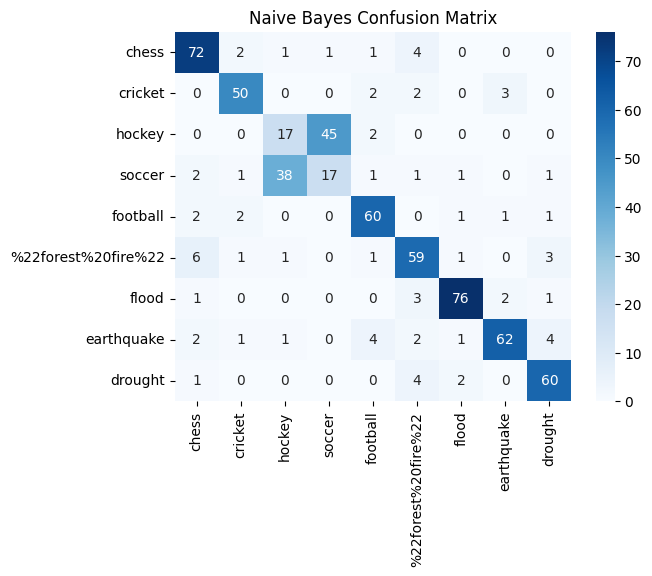

+------------------------------------------------------------------------------------------------+
|                               Naive Bayes Classification Report:                               |
+---------------------+---------------------+---------------------+--------------------+---------+
|        Class        |      precision      |        recall       |      f1-score      | support |
+---------------------+---------------------+---------------------+--------------------+---------+
|        chess        |  0.8372093023255814 |  0.8888888888888888 | 0.8622754491017963 |    81   |
|       cricket       |  0.8771929824561403 |  0.8771929824561403 | 0.8771929824561403 |    57   |
|        hockey       | 0.29310344827586204 |       0.265625      | 0.2786885245901639 |    64   |
|        soccer       |  0.2698412698412698 | 0.27419354838709675 |       0.272        |    62   |
|       football      |  0.8450704225352113 |  0.8955223880597015 | 0.8695652173913043 |    67   |
| %22fores

In [27]:
########## Question 9 - Multiclass Classification - Train and test a Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
y_pred_nb = nb_clf.predict(X_test)

# Print Naive Bayes confusion matrix with heatmap
nb_cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(nb_cm, annot=True, cmap="Blues", fmt='g', xticklabels=list(map_row_to_class.values()), yticklabels=list(map_row_to_class.values()))
plt.title('Naive Bayes Confusion Matrix')
plt.show()
# Print Naive Bayes classification report with prettytable
nb_cr = classification_report(y_test, y_pred_nb, target_names=list(map_row_to_class.values()), output_dict=True)
nb_pt = PrettyTable()
nb_pt.field_names = ["Class"] + list(nb_cr[list(map_row_to_class.values())[0]].keys())
for label in map_row_to_class.values():
    nb_pt.add_row([label] + list(nb_cr[label].values()))
nb_pt.title = "Naive Bayes Classification Report:"
print(nb_pt)

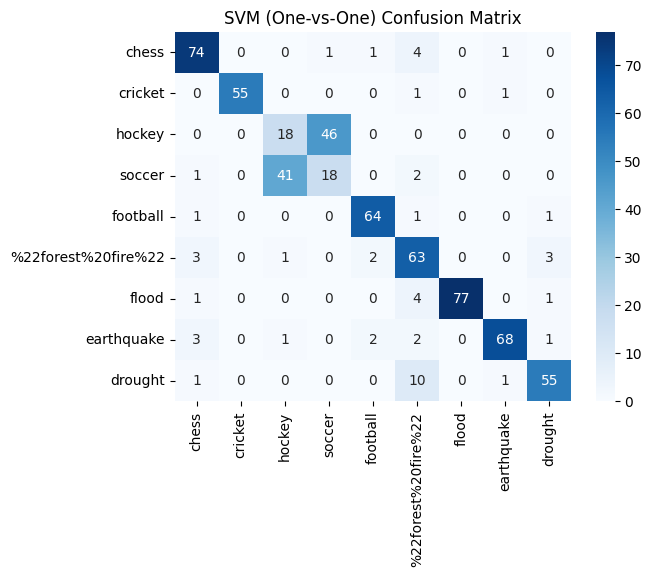

+------------------------------------------------------------------------------------------------+
|                            SVM (One-vs-One) Classification Report:                             |
+---------------------+---------------------+--------------------+---------------------+---------+
|        Class        |      precision      |       recall       |       f1-score      | support |
+---------------------+---------------------+--------------------+---------------------+---------+
|        chess        |  0.8809523809523809 | 0.9135802469135802 |  0.8969696969696969 |    81   |
|       cricket       |         1.0         | 0.9649122807017544 |  0.9821428571428572 |    57   |
|        hockey       | 0.29508196721311475 |      0.28125       |        0.288        |    64   |
|        soccer       | 0.27692307692307694 | 0.2903225806451613 | 0.28346456692913385 |    62   |
|       football      |  0.927536231884058  | 0.9552238805970149 |  0.9411764705882353 |    67   |
| %22fores

In [28]:
########## Question 9 - Multiclass Classification - Train and test a multiclass SVM classifier with one-vs-one approach
from sklearn.svm import SVC
svm_ovo_clf = SVC(kernel='linear', decision_function_shape='ovo')
svm_ovo_clf.fit(X_train, y_train)
y_pred_svm_ovo = svm_ovo_clf.predict(X_test)

# Print SVM (One-vs-One) confusion matrix with heatmap
svm_ovo_cm = confusion_matrix(y_test, y_pred_svm_ovo)
sns.heatmap(svm_ovo_cm, annot=True, cmap="Blues", fmt='g', xticklabels=list(map_row_to_class.values()), yticklabels=list(map_row_to_class.values()))
plt.title('SVM (One-vs-One) Confusion Matrix')
plt.show()

# Print SVM (One-vs-One) classification report with prettytable
svm_ovo_cr = classification_report(y_test, y_pred_svm_ovo, target_names=list(map_row_to_class.values()), output_dict=True)
svm_ovo_pt = PrettyTable()
svm_ovo_pt.field_names = ["Class"] + list(svm_ovo_cr[list(map_row_to_class.values())[0]].keys())
for label in map_row_to_class.values():
    svm_ovo_pt.add_row([label] + list(svm_ovo_cr[label].values()))
svm_ovo_pt.title = "SVM (One-vs-One) Classification Report:"
print(svm_ovo_pt)

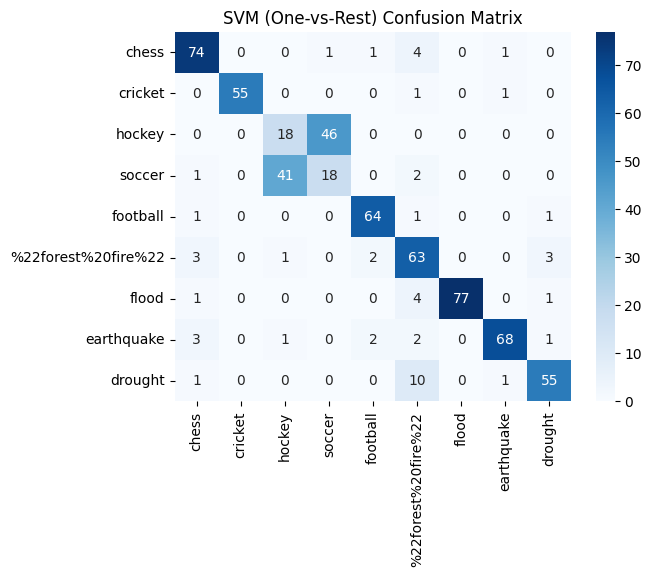

+------------------------------------------------------------------------------------------------+
|                            SVM (One-vs-Rest) Classification Report:                            |
+---------------------+---------------------+--------------------+---------------------+---------+
|        Class        |      precision      |       recall       |       f1-score      | support |
+---------------------+---------------------+--------------------+---------------------+---------+
|        chess        |  0.8809523809523809 | 0.9135802469135802 |  0.8969696969696969 |    81   |
|       cricket       |         1.0         | 0.9649122807017544 |  0.9821428571428572 |    57   |
|        hockey       | 0.29508196721311475 |      0.28125       |        0.288        |    64   |
|        soccer       | 0.27692307692307694 | 0.2903225806451613 | 0.28346456692913385 |    62   |
|       football      |  0.927536231884058  | 0.9552238805970149 |  0.9411764705882353 |    67   |
| %22fores

In [29]:
########## Question 9 - Multiclass Classification - Train and test a multiclass SVM classifier with one-vs-rest approach
svm_ovr_clf = SVC(kernel='linear', decision_function_shape='ovr')
svm_ovr_clf.fit(X_train, y_train)
y_pred_svm_ovr = svm_ovr_clf.predict(X_test)

# Print SVM (One-vs-Rest) confusion matrix with heatmap
svm_ovr_cm = confusion_matrix(y_test, y_pred_svm_ovr)
sns.heatmap(svm_ovr_cm, annot=True, cmap="Blues", fmt='g', xticklabels=list(map_row_to_class.values()), yticklabels=list(map_row_to_class.values()))
plt.title('SVM (One-vs-Rest) Confusion Matrix')
plt.show()

# Print SVM (One-vs-Rest) classification report with prettytable
svm_ovr_cr = classification_report(y_test, y_pred_svm_ovr, target_names=list(map_row_to_class.values()), output_dict=True)
svm_ovr_pt = PrettyTable()
svm_ovr_pt.field_names = ["Class"] + list(svm_ovr_cr[list(map_row_to_class.values())[0]].keys())
for label in map_row_to_class.values():
    svm_ovr_pt.add_row([label] + list(svm_ovr_cr[label].values()))
svm_ovr_pt.title = "SVM (One-vs-Rest) Classification Report:"
print(svm_ovr_pt)

Number of Training Samples: 2520
Number of Testing Samples: 630
(2520, 50)


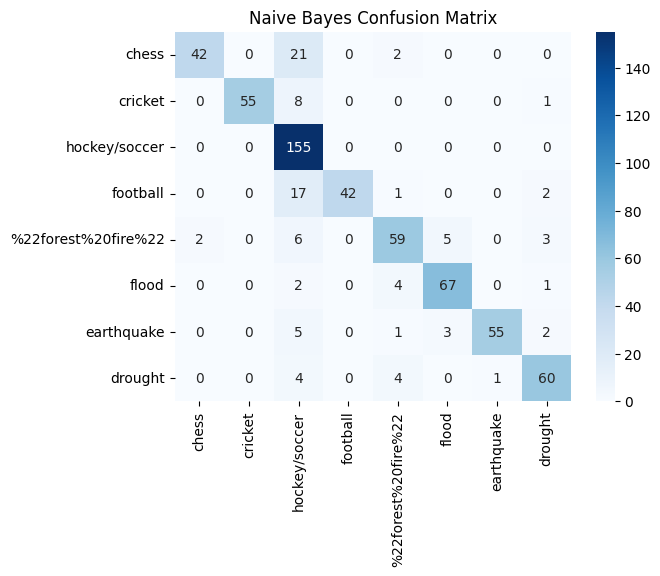

+----------------------------------------------------------------------------------------------+
|                              Naive Bayes Classification Report:                              |
+---------------------+--------------------+--------------------+--------------------+---------+
|        Class        |     precision      |       recall       |      f1-score      | support |
+---------------------+--------------------+--------------------+--------------------+---------+
|        chess        | 0.9545454545454546 | 0.6461538461538462 | 0.7706422018348624 |    65   |
|       cricket       |        1.0         |      0.859375      | 0.9243697478991597 |    64   |
|    hockey/soccer    | 0.7110091743119266 |        1.0         | 0.8310991957104558 |   155   |
|       football      |        1.0         | 0.6774193548387096 | 0.8076923076923077 |    62   |
| %22forest%20fire%22 | 0.8309859154929577 | 0.7866666666666666 | 0.8082191780821917 |    75   |
|        flood        | 0.8933

In [30]:
import seaborn as sns
from prettytable import PrettyTable
from sklearn.metrics import confusion_matrix, classification_report

# Merge hockey and soccer labels in data
df.loc[df['leaf_label_int'].isin([2, 3]), 'leaf_label_int'] = 2

multi_class_train, multi_class_test = train_test_split(df[["full_text","leaf_label_int"]], test_size=0.2)
print("Number of Training Samples:", len(multi_class_train))
print("Number of Testing Samples:", len(multi_class_test))

# Preprocessing
multi_class_train['clean'] = multi_class_train['full_text'].apply(lambda x:preprocess(x))
word_count_vec_mtrain = vectorizer.fit_transform(multi_class_train['clean'])
word_count_vec_mtrain_tf = tfidf_transformer.fit_transform(word_count_vec_mtrain)
word_count_array_mtrain = word_count_vec_mtrain_tf.toarray()
word_counts_mtrain = pd.DataFrame(data=word_count_array_mtrain, columns = vectorizer.get_feature_names_out())

multi_class_test['clean'] = multi_class_test['full_text'].apply(lambda x:preprocess(x))
word_count_vec_mtest = vectorizer.transform(multi_class_test['clean'])
word_count_vec_mtest_tf = tfidf_transformer.transform(word_count_vec_mtest)
word_count_array_mtest = word_count_vec_mtest_tf.toarray()
word_counts_mtest = pd.DataFrame(data=word_count_array_mtest, columns = vectorizer.get_feature_names_out())

k = 50
from sklearn.decomposition import NMF
nmf = NMF(n_components=k)
Xmtrain_LSI = nmf.fit_transform(word_counts_mtrain)
Xmtest_LSI = nmf.transform(word_counts_mtest)
print(Xmtrain_LSI.shape)

map_row_to_class = {0:"chess", 1:"cricket", 2:"hockey/soccer", 4:"football", 5:"%22forest%20fire%22", 6:"flood", 7:"earthquake", 8:"drought"}

# Split the data into X (features) and y (labels)
X_train = word_counts_mtrain
y_train = multi_class_train['leaf_label_int']
X_test = word_counts_mtest
y_test = multi_class_test['leaf_label_int']

from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
y_pred_nb = nb_clf.predict(X_test)

# Print Naive Bayes confusion matrix with heatmap
nb_cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(nb_cm, annot=True, cmap="Blues", fmt='g', xticklabels=list(map_row_to_class.values()), yticklabels=list(map_row_to_class.values()))
plt.title('Naive Bayes Confusion Matrix')
plt.show()

# Print Naive Bayes classification report with prettytable
nb_cr = classification_report(y_test, y_pred_nb, target_names=list(map_row_to_class.values()), output_dict=True)
nb_pt = PrettyTable()
nb_pt.field_names = ["Class"] + list(nb_cr[list(map_row_to_class.values())[0]].keys())
for label in map_row_to_class.values():
    nb_pt.add_row([label] + list(nb_cr[label].values()))
nb_pt.title = "Naive Bayes Classification Report:"
print(nb_pt)


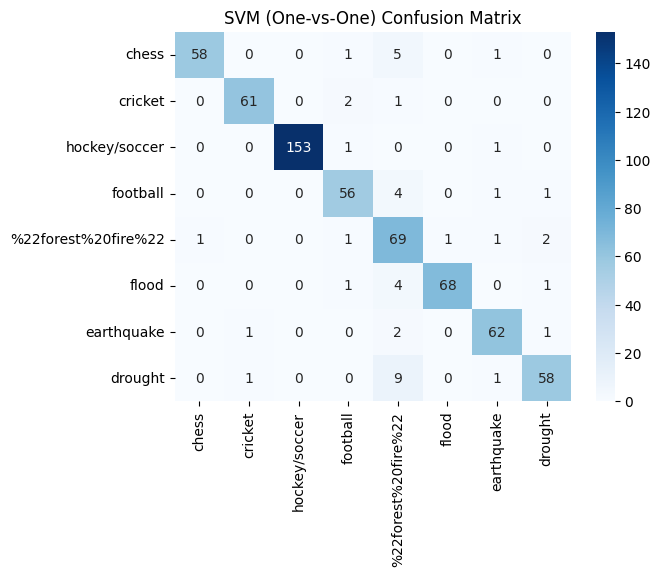

+----------------------------------------------------------------------------------------------+
|                           SVM (One-vs-One) Classification Report:                            |
+---------------------+--------------------+--------------------+--------------------+---------+
|        Class        |     precision      |       recall       |      f1-score      | support |
+---------------------+--------------------+--------------------+--------------------+---------+
|        chess        | 0.9830508474576272 | 0.8923076923076924 | 0.9354838709677421 |    65   |
|       cricket       | 0.9682539682539683 |      0.953125      | 0.9606299212598425 |    64   |
|    hockey/soccer    |        1.0         | 0.9870967741935484 | 0.9935064935064934 |   155   |
|       football      | 0.9032258064516129 | 0.9032258064516129 | 0.9032258064516129 |    62   |
| %22forest%20fire%22 | 0.7340425531914894 |        0.92        | 0.8165680473372782 |    75   |
|        flood        | 0.9855

In [31]:
from sklearn.svm import SVC
svm_ovo_clf = SVC(kernel='linear', decision_function_shape='ovo')
svm_ovo_clf.fit(X_train, y_train)
y_pred_svm_ovo = svm_ovo_clf.predict(X_test)

# Print SVM (One-vs-One) confusion matrix with heatmap
svm_ovo_cm = confusion_matrix(y_test, y_pred_svm_ovo)
sns.heatmap(svm_ovo_cm, annot=True, cmap="Blues", fmt='g', xticklabels=list(map_row_to_class.values()), yticklabels=list(map_row_to_class.values()))
plt.title('SVM (One-vs-One) Confusion Matrix')
plt.show()

# Print SVM (One-vs-One) classification report with prettytable
svm_ovo_cr = classification_report(y_test, y_pred_svm_ovo, target_names=list(map_row_to_class.values()), output_dict=True)
svm_ovo_pt = PrettyTable()
svm_ovo_pt.field_names = ["Class"] + list(svm_ovo_cr[list(map_row_to_class.values())[0]].keys())
for label in map_row_to_class.values():
    svm_ovo_pt.add_row([label] + list(svm_ovo_cr[label].values()))
svm_ovo_pt.title = "SVM (One-vs-One) Classification Report:"
print(svm_ovo_pt)

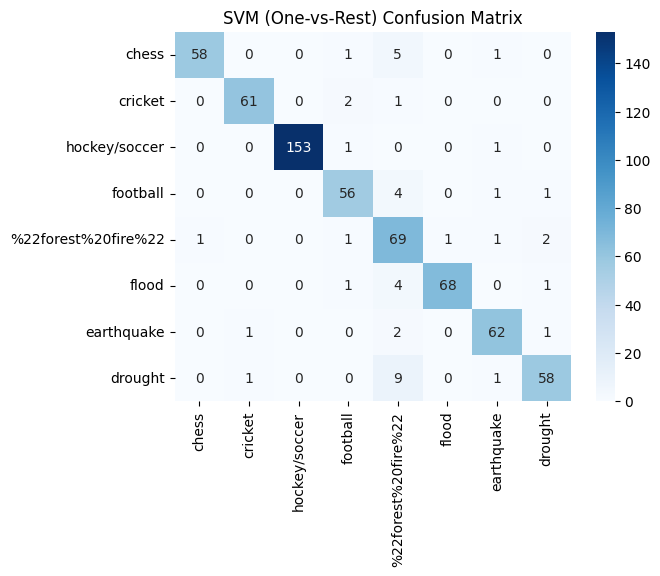

+----------------------------------------------------------------------------------------------+
|                           SVM (One-vs-Rest) Classification Report:                           |
+---------------------+--------------------+--------------------+--------------------+---------+
|        Class        |     precision      |       recall       |      f1-score      | support |
+---------------------+--------------------+--------------------+--------------------+---------+
|        chess        | 0.9830508474576272 | 0.8923076923076924 | 0.9354838709677421 |    65   |
|       cricket       | 0.9682539682539683 |      0.953125      | 0.9606299212598425 |    64   |
|    hockey/soccer    |        1.0         | 0.9870967741935484 | 0.9935064935064934 |   155   |
|       football      | 0.9032258064516129 | 0.9032258064516129 | 0.9032258064516129 |    62   |
| %22forest%20fire%22 | 0.7340425531914894 |        0.92        | 0.8165680473372782 |    75   |
|        flood        | 0.9855

In [32]:
svm_ovr_clf = SVC(kernel='linear', decision_function_shape='ovr')
svm_ovr_clf.fit(X_train, y_train)
y_pred_svm_ovr = svm_ovr_clf.predict(X_test)

# Print SVM (One-vs-Rest) confusion matrix with heatmap
svm_ovr_cm = confusion_matrix(y_test, y_pred_svm_ovr)
sns.heatmap(svm_ovr_cm, annot=True, cmap="Blues", fmt='g', xticklabels=list(map_row_to_class.values()), yticklabels=list(map_row_to_class.values()))
plt.title('SVM (One-vs-Rest) Confusion Matrix')
plt.show()

# Print SVM (One-vs-Rest) classification report with prettytable
svm_ovr_cr = classification_report(y_test, y_pred_svm_ovr, target_names=list(map_row_to_class.values()), output_dict=True)
svm_ovr_pt = PrettyTable()
svm_ovr_pt.field_names = ["Class"] + list(svm_ovr_cr[list(map_row_to_class.values())[0]].keys())
for label in map_row_to_class.values():
    svm_ovr_pt.add_row([label] + list(svm_ovr_cr[label].values()))
svm_ovr_pt.title = "SVM (One-vs-Rest) Classification Report:"
print(svm_ovr_pt)